In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
#import os.path
#import glob

In [7]:
plt.rcParams['figure.facecolor'] = 'white'

In [44]:
import seaborn as sns

In [2]:
import matplotlib.colors as mcolors

In [3]:
califaoutpath = '/vol/aibn1081/data1/brodriguez/CALIFA/'
acaoutpath    = '/vol/aibn1081/data1/brodriguez/ACA/'
califainpath  = '/vol/alcina/data1/shared/EDGE/PIPE3DS_v2.3/'
acainpath     = '/vol/alcina/data1/shared/EDGE/aca_edge_natv/cubes/'

In [4]:
Database = pd.read_csv('/users/brodriguez/Documents/ACA_database_2024-01-18.csv')
Database['Source'] = Database['Source'].astype("category")
Database['Final_QS'] = Database['Final_QS'].astype("category")
Database['Final_NA'] = Database['Final_NA'].astype("category")
Database

Source Final_QS Final_NA  Inclination          PA    Re_kpc  \
0      CGCG429-012       fR     nonA    59.991884   96.449515  1.397272   
1      CGCG429-012       fR     nonA    59.991884   96.449515  1.397272   
2      CGCG429-012       fR     nonA    59.991884   96.449515  1.397272   
3      CGCG429-012       fR     nonA    59.991884   96.449515  1.397272   
4      CGCG429-012       fR     nonA    59.991884   96.449515  1.397272   
...            ...      ...      ...          ...         ...       ...   
87458   VV488NED02       SF     nonA    73.160751  158.756316  3.143968   
87459   VV488NED02       SF     nonA    73.160751  158.756316  3.143968   
87460   VV488NED02       SF     nonA    73.160751  158.756316  3.143968   
87461   VV488NED02       SF     nonA    73.160751  158.756316  3.143968   
87462   VV488NED02       SF     nonA    73.160751  158.756316  3.143968   

               RA        DEC   Rgal_kpc     T_gal  ...  alphaCO_O3N2  \
0      339.209394  14.378665  20.953642 -1.401156  ...      4.342843   
1      339.208964  14.378665  20.989356 -1.427077  ...      4.662306   
2      339.208534  14.378665  21.039122 -1.452892  ...      5.077261   
3      339.208104  14.378665  21.102840 -1.478569  ...      5.457726   
4      339.207244  14.378665  21.271600 -1.529377  ...      6.630550   
...           ...        ...        ...       ...  ...           ...   
87458  344.205560  -8.962386  17.696722 -2.064209  ...      6.223236   
87459  344.205279  -8.962386  18.703727 -2.042717  ...      6.326578   
87460  344.216246  -8.961830  26.411430  1.738550  ...      5.349539   
87461  344.216246  -8.961552  26.875847  1.747366  ...      5.247439   
87462  344.215965  -8.961552  25.842126  1.759268  ...      5.190919   

       alphaCO_N2  S_mol_O3N2  CO_vdisp  star_vdisp  f_CO          sSFR  SFE  \
0        3.992809         NaN       NaN    1.732646   NaN  1.427581e-11  NaN   
1        4.193988         NaN       NaN    1.796422   NaN  1.358039e-11  NaN   
2        4.663437         NaN       NaN    1.862751   NaN  1.673094e-11  NaN   
3        5.266703         NaN       NaN    1.924607   NaN  2.147072e-11  NaN   
4        6.229237         NaN       NaN    2.047223   NaN  2.043582e-11  NaN   
...           ...         ...       ...         ...   ...           ...  ...   
87458    5.606821         NaN       NaN    2.900236   NaN  5.364717e-10  NaN   
87459    5.701627         NaN       NaN    2.922467   NaN  5.843134e-10  NaN   
87460    5.075181         NaN       NaN    4.504568   NaN  4.136860e-11  NaN   
87461    5.060841         NaN       NaN    4.596295   NaN  4.094734e-11  NaN   
87462    5.012433         NaN       NaN    4.553523   NaN  3.960686e-11  NaN   

       P_h  P_DE  
0      NaN   NaN  
1      NaN   NaN  
2      NaN   NaN  
3      NaN   NaN  
4      NaN   NaN  
...    ...   ...  
87458  NaN   NaN  
87459  NaN   NaN  
87460  NaN   NaN  
87461  NaN   NaN  
87462  NaN   NaN  

[87463 rows x 26 columns]

/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


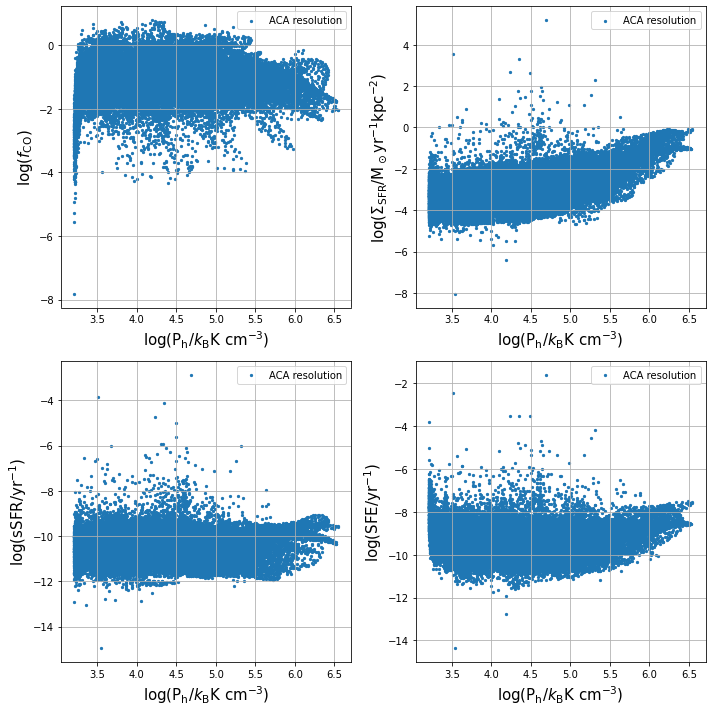

In [5]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[np.log10(Database['f_CO']),np.log10(Database['S_SFR']),np.log10(Database['sSFR']),np.log10(Database['SFE'])],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    ax.scatter(np.log10(Database['P_h']),frame,s=5,label='ACA resolution')
    #ax.scatter(np.log10(Ph_hex),frame[1],s=5,label='PyStructure')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    ax.legend(loc='best')
fig.tight_layout()
plt.show()

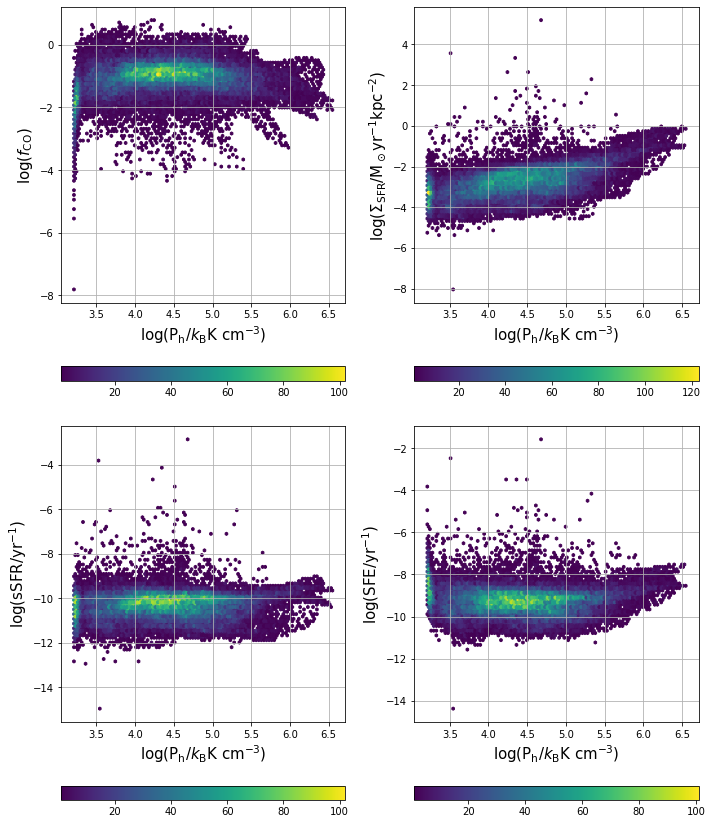

In [11]:
fig, axs = plt.subplots(2,2,figsize=(10,12))
for ax,frame,title,label in zip(axs.ravel(),[np.log10(Database['f_CO']),np.log10(Database['S_SFR']),np.log10(Database['sSFR']),np.log10(Database['SFE'])],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(np.log10(Database['P_h']),frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    #ax.legend(loc='best')
fig.tight_layout()
plt.show()

In [6]:
Database_SF = Database[np.floor(Database['Ha_mask'])==1].copy()
Database_SF

Source Final_QS Final_NA  Inclination          PA     Re_kpc  \
1946       IC1079       MX     nonA    53.368636  172.896524  11.691983   
2016       IC1079       MX     nonA    53.368636  172.896524  11.691983   
2037       IC1528       SF     nonA    69.618338  163.338896   4.121280   
2038       IC1528       SF     nonA    69.618338  163.338896   4.121280   
2042       IC1528       SF     nonA    69.618338  163.338896   4.121280   
...           ...      ...      ...          ...         ...        ...   
87452  VV488NED02       SF     nonA    73.160751  158.756316   3.143968   
87454  VV488NED02       SF     nonA    73.160751  158.756316   3.143968   
87455  VV488NED02       SF     nonA    73.160751  158.756316   3.143968   
87458  VV488NED02       SF     nonA    73.160751  158.756316   3.143968   
87459  VV488NED02       SF     nonA    73.160751  158.756316   3.143968   

               RA       DEC   Rgal_kpc     T_gal  ...  alphaCO_O3N2  \
1946   224.147622  9.375210  14.146561 -2.601284  ...      5.835461   
2016   224.151423  9.376877  16.052596  2.718687  ...      5.638586   
2037     1.271172 -7.101752  11.224980 -0.880201  ...      8.258283   
2038     1.270892 -7.101752  11.734145 -0.923447  ...      7.348774   
2042     1.269772 -7.101752  13.948512 -1.063064  ...      6.376762   
...           ...       ...        ...       ...  ...           ...   
87452  344.214559 -8.962664  18.822958  1.795945  ...      5.546658   
87454  344.205560 -8.962664  17.923197 -2.037897  ...      5.969297   
87455  344.205279 -8.962664  18.939833 -2.018073  ...      6.036979   
87458  344.205560 -8.962386  17.696722 -2.064209  ...      6.223236   
87459  344.205279 -8.962386  18.703727 -2.042717  ...      6.326578   

       alphaCO_N2    S_mol_O3N2  CO_vdisp  star_vdisp      f_CO          sSFR  \
1946     4.247023           NaN       NaN   24.291254       NaN  8.273366e-12   
2016     4.414922           NaN       NaN   18.049336       NaN  1.395872e-11   
2037     9.094755           NaN       NaN    4.119539       NaN  2.330379e-10   
2038     7.847679           NaN       NaN    4.279713       NaN  1.602828e-10   
2042     6.446219           NaN       NaN    4.544147       NaN  1.197828e-10   
...           ...           ...       ...         ...       ...           ...   
87452    4.474649  1.124528e+06  3.995273    4.551730  0.376014  3.046738e-11   
87454    5.195770           NaN       NaN    3.031492       NaN  4.306902e-10   
87455    5.245111           NaN       NaN    3.041913       NaN  4.639237e-10   
87458    5.606821           NaN       NaN    2.900236       NaN  5.364717e-10   
87459    5.701627           NaN       NaN    2.922467       NaN  5.843134e-10   

                SFE          P_h         P_DE  
1946            NaN          NaN          NaN  
2016            NaN          NaN          NaN  
2037            NaN          NaN          NaN  
2038            NaN          NaN          NaN  
2042            NaN          NaN          NaN  
...             ...          ...          ...  
87452  8.102722e-11  2892.285193  2982.958743  
87454           NaN          NaN          NaN  
87455           NaN          NaN          NaN  
87458           NaN          NaN          NaN  
87459           NaN          NaN          NaN  

[20993 rows x 26 columns]

In [13]:
Database_SF['log_S_Mstar'] = np.log10(Database_SF.loc[:,'S_Mstar'])
Database_SF['log_S_mol_O3N2'] = np.log10(Database_SF.loc[:,'S_mol_O3N2'])
Database_SF['log_P_h'] = np.log10(Database_SF.loc[:,'P_h'])
Database_SF['log_f_CO'] = np.log10(Database_SF.loc[:,'f_CO'])
Database_SF['log_S_SFR'] = np.log10(Database_SF.loc[:,'S_SFR'])
Database_SF['log_sSFR'] = np.log10(Database_SF.loc[:,'sSFR'])
Database_SF['log_SFE'] = np.log10(Database_SF.loc[:,'SFE'])

/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
A = 0.3
b = 0.95

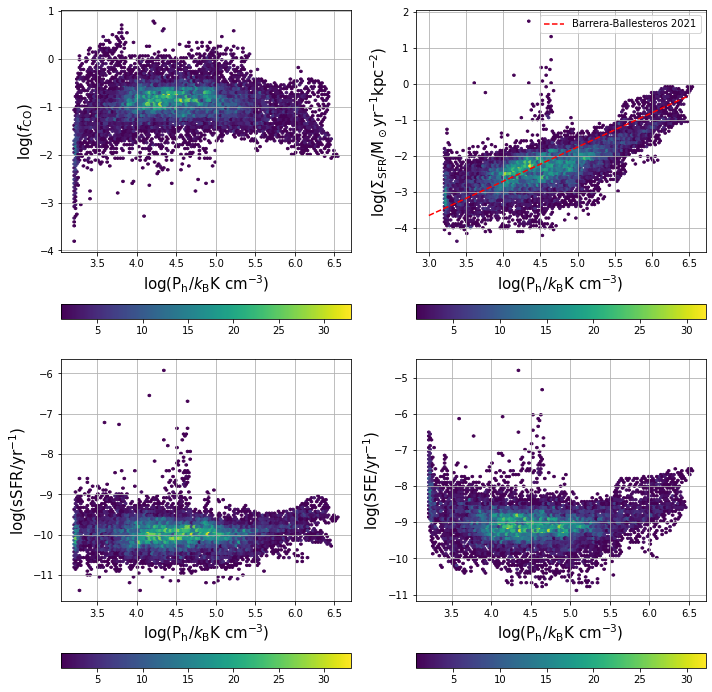

In [14]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[Database_SF['log_f_CO'],Database_SF['log_S_SFR'],Database_SF['log_sSFR'],Database_SF['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF['log_P_h'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

(1.0, 1.0, 1.0, 1.0)
(1.0, 1.0, 1.0, 1.0)


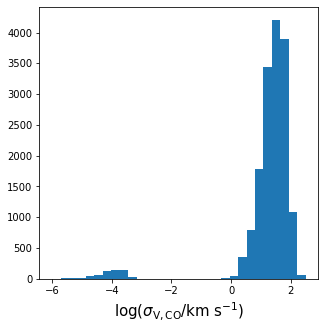

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(np.log10(Database_SF['CO_vdisp']),bins=np.linspace(-6,2.5,31))
ax.set_xlabel('log($\sigma_\mathrm{V,CO}$/km s$^{-1}$)',fontsize=15)
plt.show()

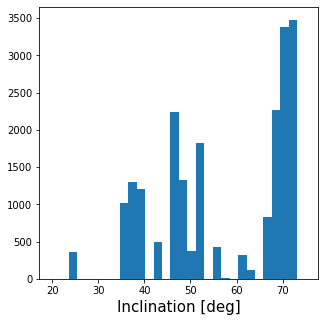

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(Database_SF['Inclination'],bins=np.linspace(20,75,31))
ax.set_xlabel('Inclination [deg]',fontsize=15)
plt.show()

/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


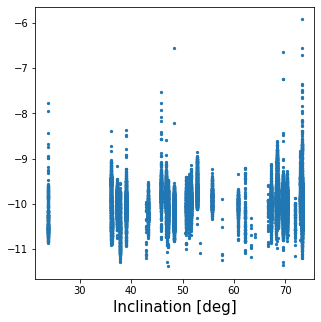

In [10]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Database_SF['Inclination'],np.log10(Database_SF['sSFR']),s=5)
ax.set_xlabel('Inclination [deg]',fontsize=15)
plt.show()

In [15]:
Database_SF = Database_SF[Database_SF['Inclination']<70]
Database_SF = Database_SF[np.log10(Database_SF['CO_vdisp'])>-2]

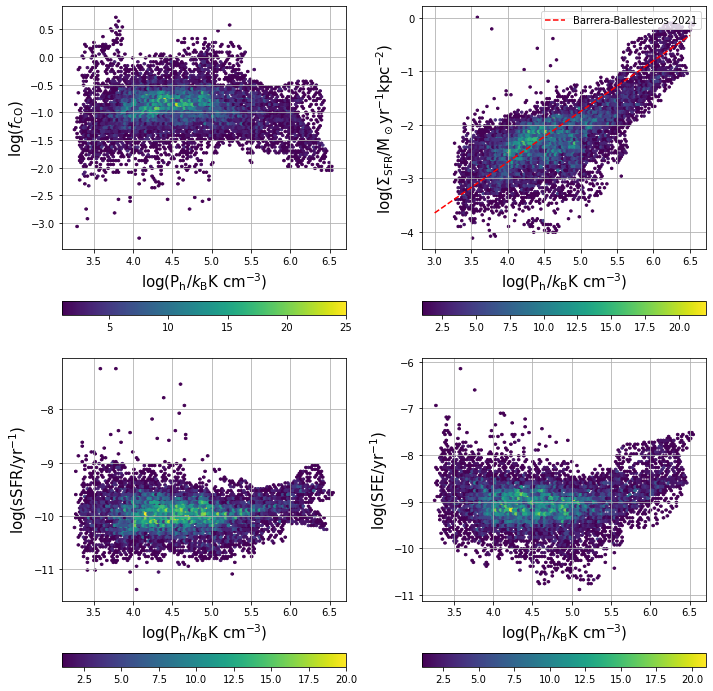

In [16]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[Database_SF['log_f_CO'],Database_SF['log_S_SFR'],Database_SF['log_sSFR'],Database_SF['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF['log_P_h'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [17]:
Database_SF['Rgal_Re'] = Database_SF['Rgal_kpc']/Database_SF['Re_kpc']

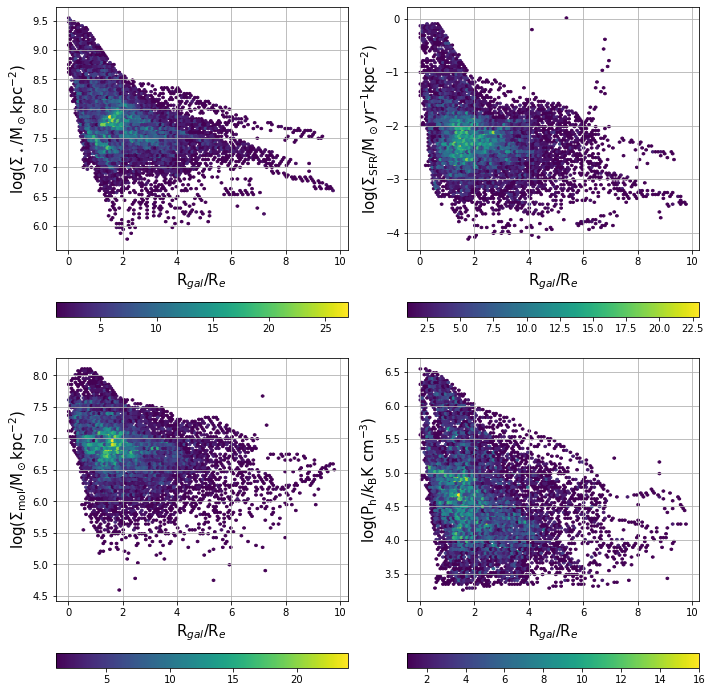

In [21]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,label in zip(axs.ravel(),[Database_SF['log_S_Mstar'],Database_SF['log_S_SFR'],Database_SF['log_S_mol_O3N2'],Database_SF['log_P_h']],
                          [r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)']):
    im = ax.hexbin(Database_SF['Rgal_Re'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'R$_{gal}$/R$_e$',size=15)

fig.tight_layout()
plt.show()

# Pearson correlation coefficient

In [27]:
np.broadcast_to(np.arange(1,6),(5,5,5))

array([[[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]]])

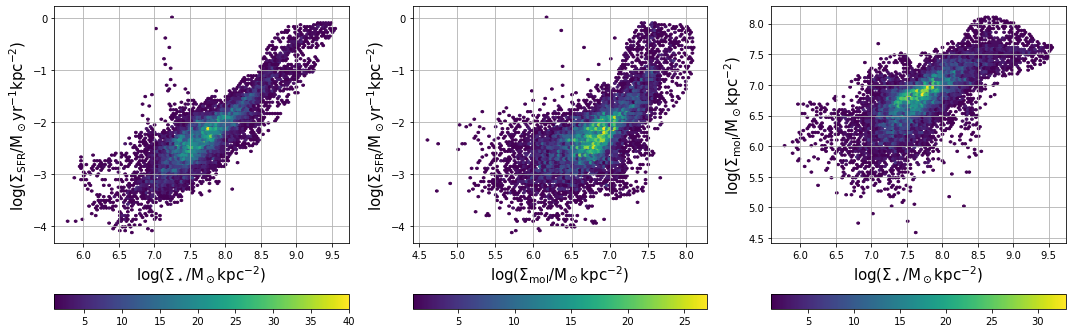

In [25]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
im = axs[0].hexbin(Database_SF['log_S_Mstar'],Database_SF['log_S_SFR'],mincnt=1)
fig.colorbar(im,ax=axs[0],orientation='horizontal')
axs[0].set_xlabel(r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',size=15)
axs[0].set_ylabel(r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',size=15)
axs[0].grid(True)
im = axs[1].hexbin(Database_SF['log_S_mol_O3N2'],Database_SF['log_S_SFR'],mincnt=1)
fig.colorbar(im,ax=axs[1],orientation='horizontal')
axs[1].set_xlabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
axs[1].set_ylabel(r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',size=15)
axs[1].grid(True)
im = axs[2].hexbin(Database_SF['log_S_Mstar'],Database_SF['log_S_mol_O3N2'],mincnt=1)
fig.colorbar(im,ax=axs[2],orientation='horizontal')
axs[2].set_xlabel(r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',size=15)
axs[2].set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
axs[2].grid(True)
fig.tight_layout()
plt.show()

In [139]:
high_SFR = Database_SF.loc[Database_SF['sSFR']>10**-8.8].copy()
high_SFR_sources = np.unique(high_SFR['Source'])
high_SFR_sources
#low_vdisp = Database_SF.loc[np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp'])<6].copy()
#low_vdisp_sources = np.unique(low_vdisp['Source'])
#low_vdisp_sources

array(['IC1528', 'NGC0001', 'NGC1056', 'NGC7364', 'NGC7625', 'NGC7716',
       'UGC00312', 'UGC01368', 'UGC11680NED02', 'UGC11982', 'VV488NED02'],
      dtype=object)

In [156]:
aca_table = pd.read_csv('/users/brodriguez/Documents/ACA_sourcelist.csv',sep=',',index_col=0)
aca_table

califa_file Final_QS Final_NA          RA        DEC  \
source                                                                    
CGCG429-012        CGCG429-012       fR     nonA  339.207500  14.386972   
IC1079                  IC1079       MX     nonA  224.150417   9.369750   
IC1528                  IC1528       SF     nonA    1.272083  -7.093417   
IC2341                  IC2341       fR     nonA  125.922500  21.434861   
MCG-01-01-012    MCG-01-01-012       MX     nonA  359.795000  -4.191833   
MCG-01-10-015    MCG-01-10-015       SF     nonA   54.662917  -5.347333   
MCG-01-52-012    MCG-01-52-012       nR     nonA  309.457917  -6.090750   
MCG-02-02-030    MCG-02-02-030      QnR     sAGN    7.530417 -11.113639   
MCG-02-51-004    MCG-02-51-004       SF     nonA  303.915833 -13.622028   
NGC0001                NGC0001       SF     nonA    1.815833  27.708250   
NGC0155                NGC0155       fR     nonA    8.666667 -10.766500   
NGC0169              NGC0169_2       MX     wAGN    9.215417  23.990361   
NGC0171                NGC0171       cQ     nonA    9.339583 -19.934250   
NGC0180                NGC0180      QnR     nonA    9.490417   8.635194   
NGC0693                NGC0693       SF     nonA   27.628333   6.145222   
NGC0731                NGC0731       fR     nonA   28.734167  -9.010806   
NGC0768                NGC0768       SF     nonA   29.670417   0.529222   
NGC0955                NGC0955       nR     nonA   37.637917  -1.108417   
NGC1056                NGC1056       SF     nonA   40.701250  28.574111   
NGC1542                NGC1542       MX     nonA   64.308750   4.781639   
NGC2449                NGC2449       MX     nonA  116.834167  26.930306   
NGC2540                NGC2540       SF     nonA  123.193333  26.361833   
NGC2554                NGC2554       nR     wAGN  124.472917  23.472194   
NGC2595                NGC2595      QnR     nonA  126.924583  21.479083   
NGC2596                    ---       SF     nonA  126.860000  17.283972   
NGC3300                NGC3300       fR     nonA  159.160000  14.171139   
NGC6427                NGC6427       fR     nonA  265.910417  25.493917   
NGC7025                NGC7025       nR     nonA  316.947083  16.335861   
NGC7194                NGC7194       fR     nonA  330.878750  12.636778   
NGC7311                NGC7311       cQ     nonA  338.527917   5.569889   
NGC7321                NGC7321      QnR     wAGN  339.116667  21.621806   
NGC7364                NGC7364       SF     nonA  341.101250  -0.162083   
NGC7466                NGC7466       SF     sAGN  345.514167  27.052806   
NGC7489                NGC7489       SF     nonA  346.885833  22.998222   
NGC7625                NGC7625       SF     nonA  350.125000  17.226389   
NGC7716                NGC7716       cQ     nonA  354.130833   0.297278   
UGC00312              UGC00312       SF     nonA    7.849583   8.466833   
UGC00335NED02  UGC00335NED02_0       nR     nonA    8.488750   7.268306   
UGC01123              UGC01123       MX     nonA   23.532917  -1.032278   
UGC01368              UGC01368       SF     nonA   28.554583   7.883639   
UGC01938              UGC01938       SF     nonA   37.092083  23.214639   
UGC02099              UGC02099       MX     nonA   39.304167  21.567778   
UGC04240              UGC04240       SF     nonA  122.025417  14.837861   
UGC04245              UGC04245       cQ     nonA  122.190417  18.194167   
UGC04455              UGC04455       cQ     nonA  127.886667  -1.197722   
UGC05396              UGC05396       SF     nonA  150.418333  10.756389   
UGC08322              UGC08322       MX     nonA  198.753750  12.725278   
UGC08781              UGC08781       cQ     nonA  208.094583  21.539444   
UGC10972              UGC10972       cQ     nonA  266.590833  26.543583   
UGC11649              UGC11649       MX     nonA  313.865000  -1.225250   
UGC11680NED02    UGC11680NED02       SF     nonA  316.940833   3.877889   
UGC11717                   ---       MX     

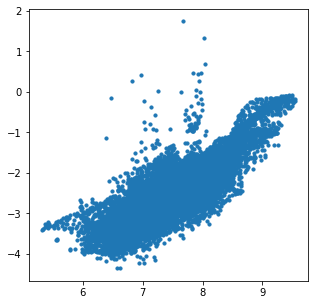

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(np.log10(Database_SF['S_Mstar']),np.log10(Database_SF['S_SFR']),s=10),
plt.show()

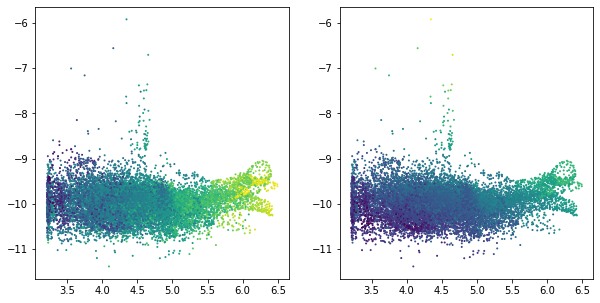

In [171]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
sample = Database_SF[np.log10(Database_SF['S_SFR'])>-10]
axs[0].scatter(np.log10(sample['P_h']),np.log10(sample['sSFR']),s=1,c=np.log10(sample['S_Mstar']))
axs[1].scatter(np.log10(sample['P_h']),np.log10(sample['sSFR']),s=1,c=np.log10(sample['S_SFR']))
plt.show()

In [150]:
from astropy.cosmology import LambdaCDM#, FlatLambdaCDM
cosmo = LambdaCDM(H0=69.7,Om0=0.3,Ode0=0.7)

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


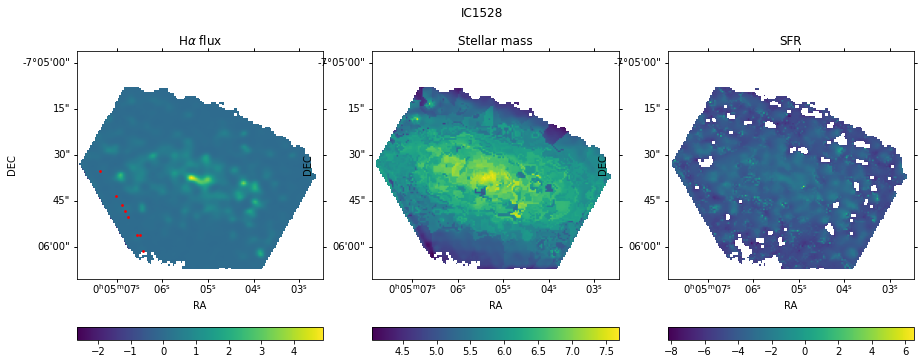

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


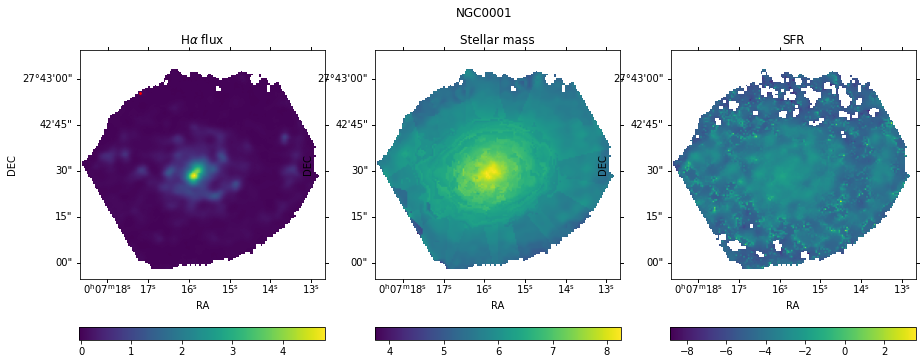

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


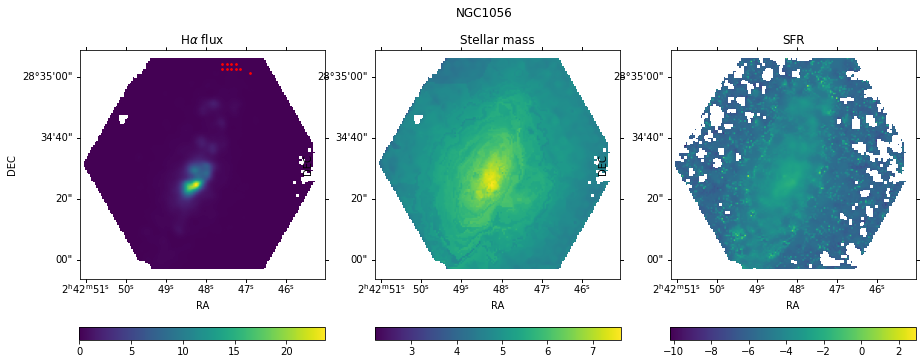

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


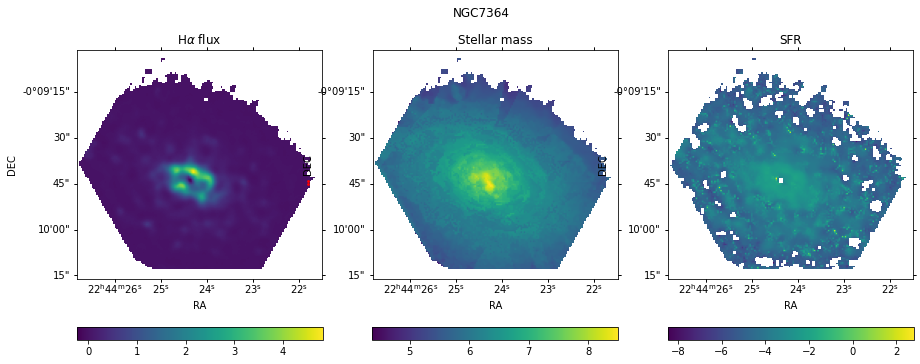

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


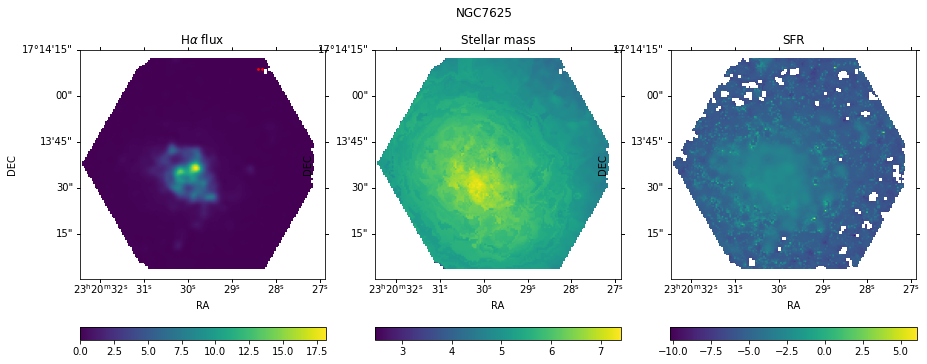

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


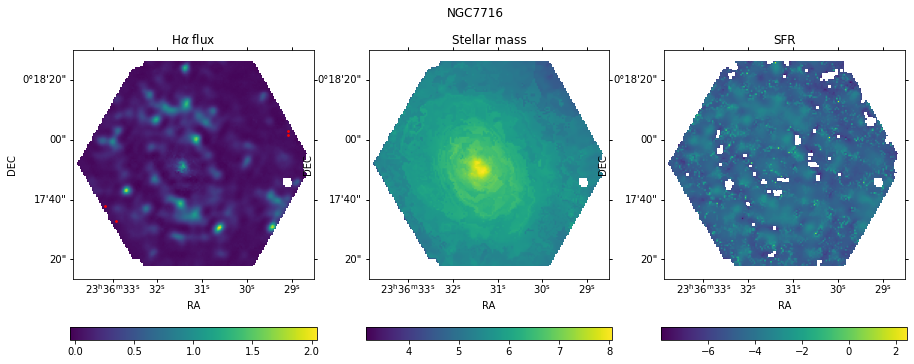

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


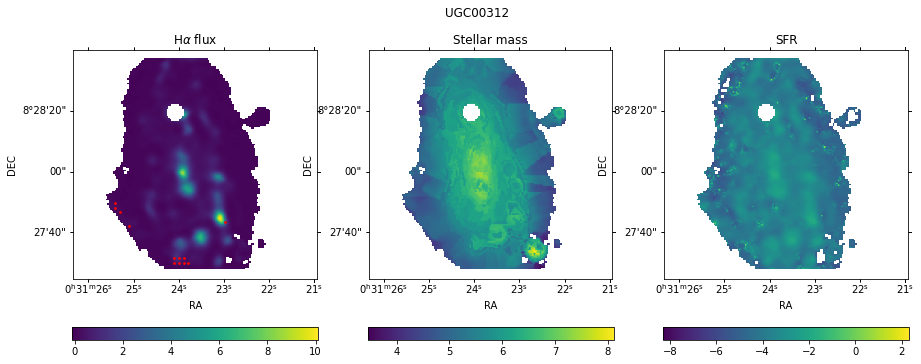

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


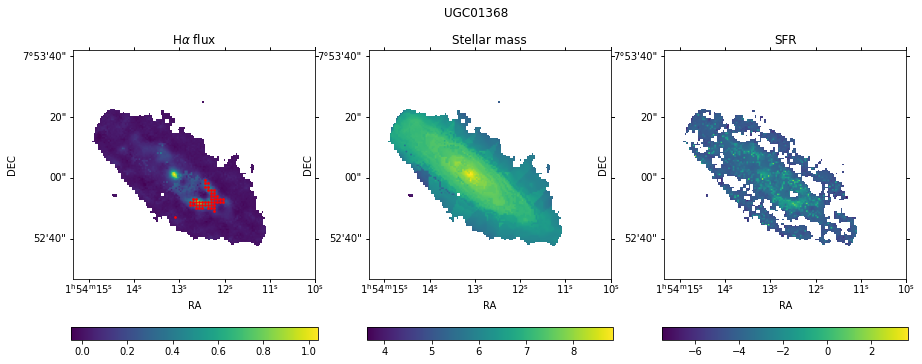

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


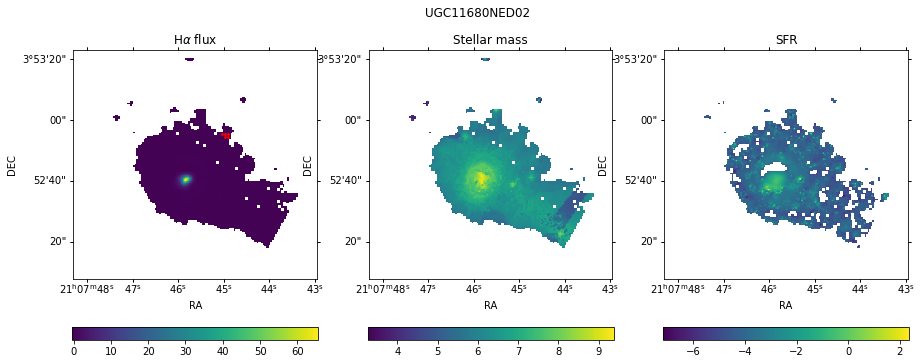

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


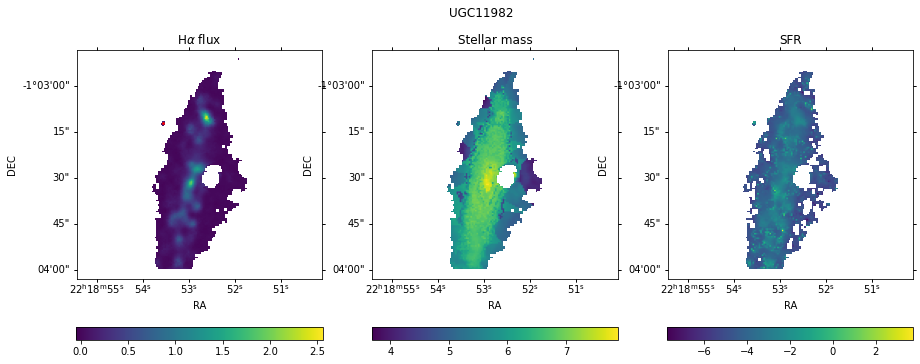

/tmp/ipykernel_873912/1192946370.py:25: RuntimeWarning: invalid value encountered in log10
  for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],


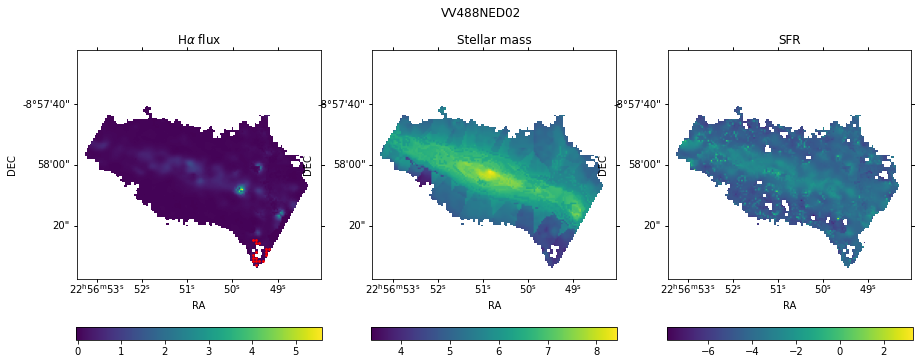

In [161]:
for source in high_SFR_sources[:]:
    M_star, califa_hdr = get_data(califaoutpath+source+'_Mstar.fits',header=True)
    w_califa = WCS(califa_hdr)
    F_Ha = get_data(califaoutpath+source+'_F_Ha.fits')
    F_Hb = get_data(califaoutpath+source+'_F_Hb.fits')

    coords_world = np.array([high_SFR.loc[high_SFR['Source']==source,'RA'].to_numpy(),high_SFR.loc[high_SFR['Source']==source,'DEC'].to_numpy()]).T
    #print(coords_world.shape)
    coords_pixel1 = w_califa.all_world2pix(coords_world, 0).T
    
    D_lum = cosmo.luminosity_distance(aca_table.loc[source,'z_stars'])
    Ha_to_Hb = np.where(F_Ha/F_Hb>2.86,F_Ha/F_Hb,2.86) # imposing minimum ratio of 2.86
    Ha_to_Hb = np.where(np.isfinite(F_Ha),Ha_to_Hb,np.nan)
    # from Villanueva et al. 2023
    A_Ha = 5.86*np.log10(Ha_to_Hb/2.86)
    A_Ha_mean = np.nanmean(A_Ha[A_Ha>0])
    A_Ha = np.where(np.isnan(F_Hb)&~np.isnan(F_Ha),A_Ha_mean,A_Ha)
    SFR = 1.61*7.9*(10**-(42+16))*F_Ha*np.power(10,A_Ha/2.5)*4*np.pi*(D_lum**2).to(u.cm**2).value
    

    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(1,3,1,projection=w_califa)
    ax2 = fig.add_subplot(1,3,2,projection=w_califa)
    ax3 = fig.add_subplot(1,3,3,projection=w_califa)
    for ax,frame,label in zip([ax1,ax2,ax3],[F_Ha,np.log10(M_star),np.log10(SFR)],
                              [r'H$\alpha$ flux',r'Stellar mass',r'SFR']):
        im = ax.imshow(frame, origin='lower')
        fig.colorbar(im,ax=ax,orientation='horizontal')
        ax.set_title(label)#,fontsize=15)
        ax.coords['ra'].set_axislabel('RA')
        ax.coords['dec'].set_axislabel('DEC')
    ax1.scatter(coords_pixel1[0],coords_pixel1[1],c='r',s=3)#,label='ACA $R_e$')
    #ax2.scatter(coords_pixel1[0],coords_pixel1[1],c='r',s=3)
    fig.suptitle(source)
    plt.show()
    plt.close()

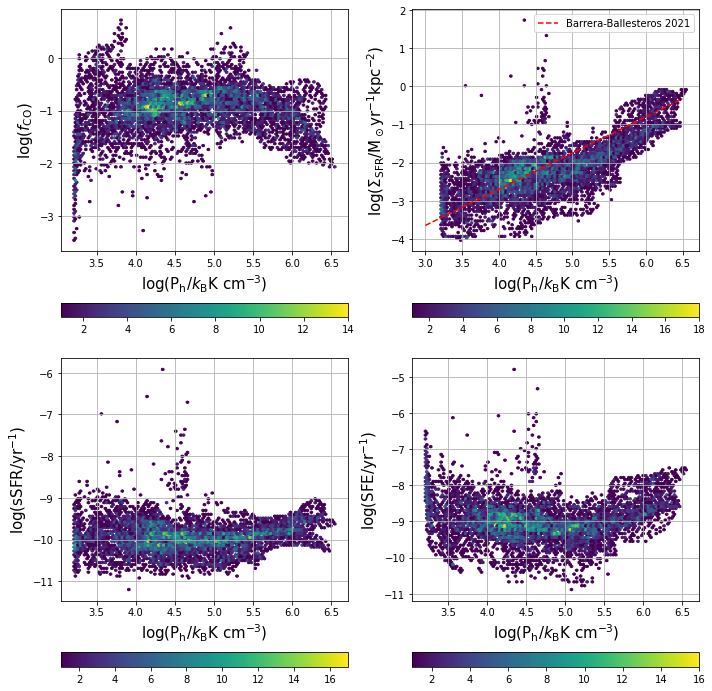

In [86]:
sample = Database_SF[np.isin(Database_SF['Source'],high_SFR)].copy()
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[sample['log_f_CO'],sample['log_S_SFR'],sample['log_sSFR'],sample['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(sample['log_P_h'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [17]:
Database_SF.loc[np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp'])<6,'Source']

2102         IC1528
2104         IC1528
2137         IC1528
2141         IC1528
2173         IC1528
            ...    
87262    VV488NED02
87282    VV488NED02
87283    VV488NED02
87314    VV488NED02
87315    VV488NED02
Name: Source, Length: 1232, dtype: object

In [117]:
low_vdisp = Database_SF.loc[np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp'])<6].copy()
low_vdisp_sources = np.unique(low_vdisp['Source'])
low_vdisp_sources

array(['IC1528', 'MCG-01-01-012', 'MCG-01-10-015', 'MCG-02-02-030',
       'MCG-02-51-004', 'NGC0001', 'NGC0171', 'NGC0180', 'NGC0693',
       'NGC0768', 'NGC0955', 'NGC1056', 'NGC1542', 'NGC2540', 'NGC2595',
       'NGC6427', 'NGC7311', 'NGC7321', 'NGC7364', 'NGC7466', 'NGC7489',
       'NGC7625', 'NGC7716', 'UGC00312', 'UGC01938', 'UGC04240',
       'UGC04245', 'UGC05396', 'UGC08781', 'UGC10972', 'UGC11680NED02',
       'UGC11792', 'UGC11982', 'UGC12250', 'UGC12348', 'VV488NED02'],
      dtype=object)

In [120]:
def get_data(filename,header=False):
    hdu_list = fits.open(filename)
    data = hdu_list[0].data
    hdr = hdu_list[0].header
    hdu_list.close()
    if header:
        return data, hdr
    else:
        return data

In [126]:
from astropy.wcs import WCS

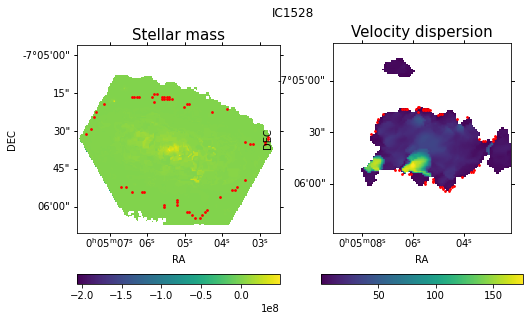

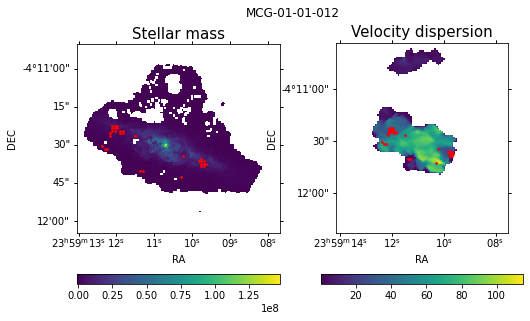

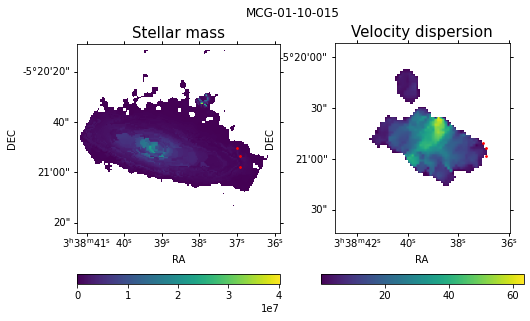

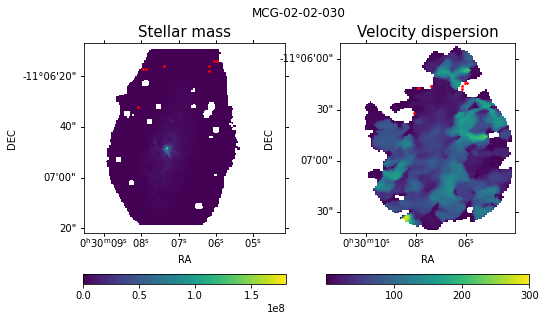

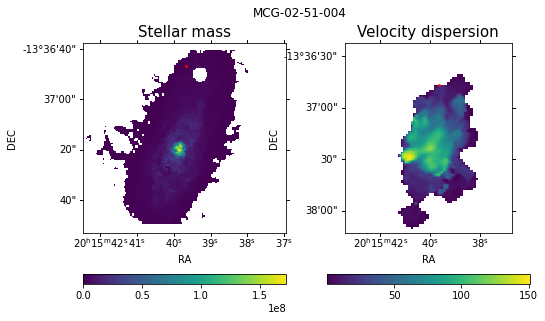

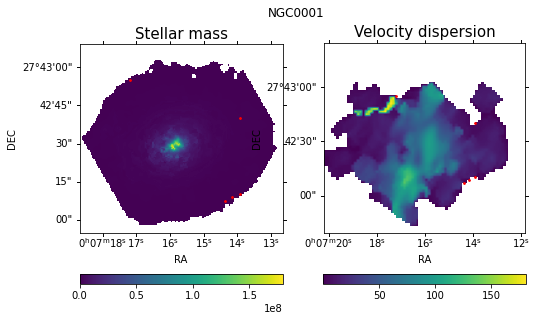

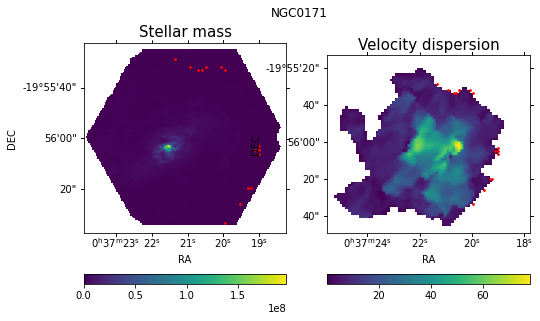

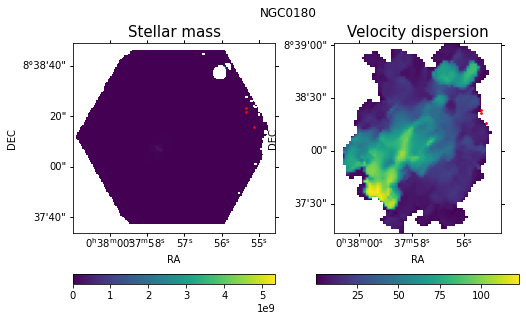

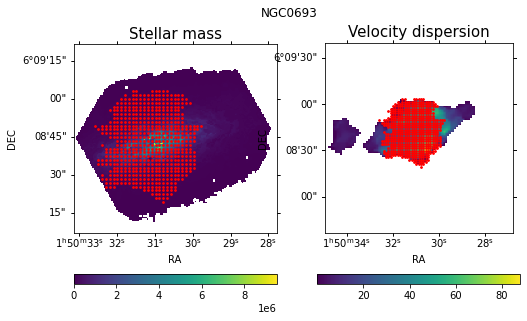

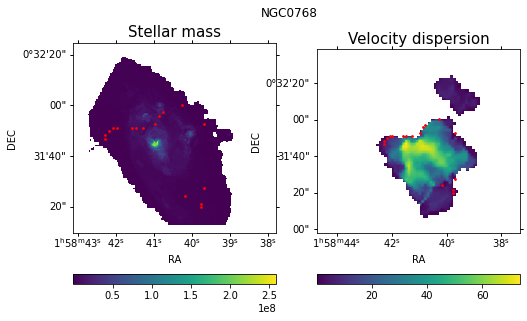

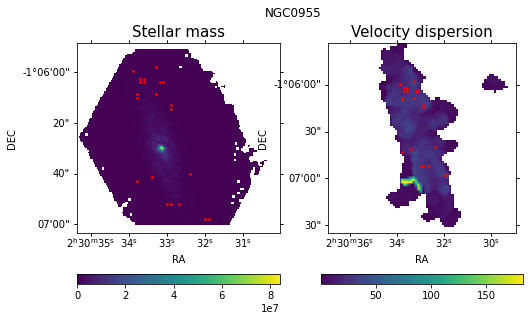

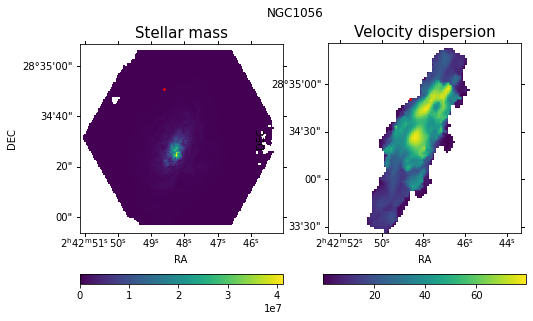

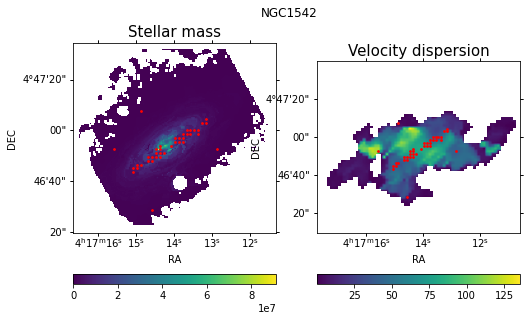

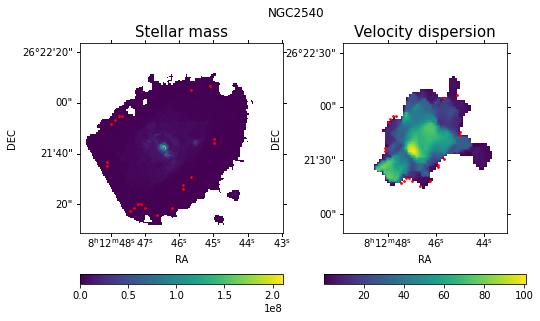

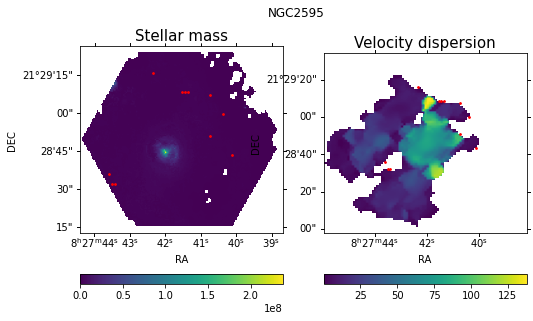

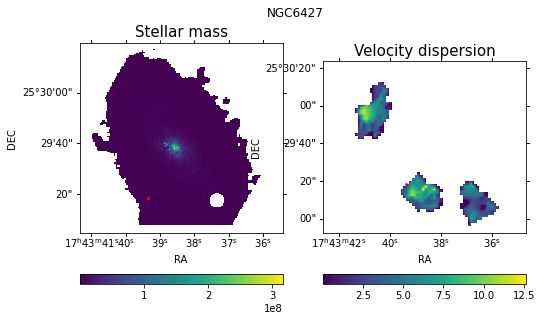

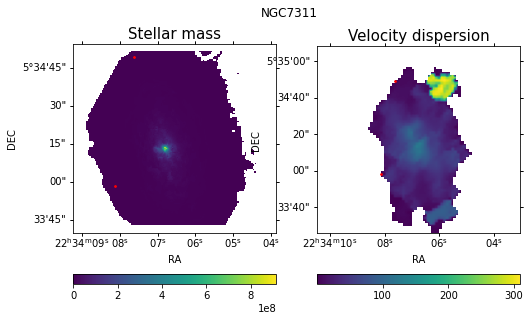

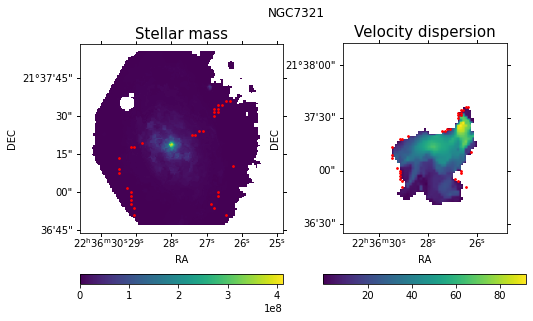

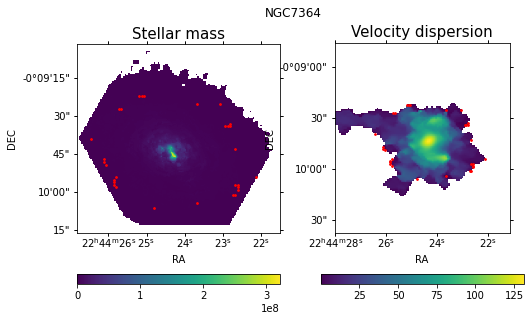

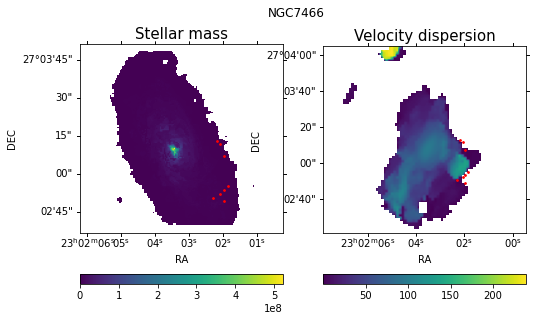

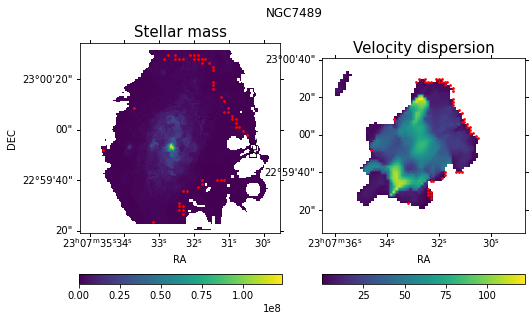

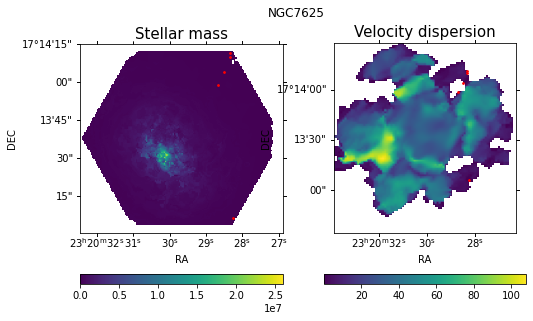

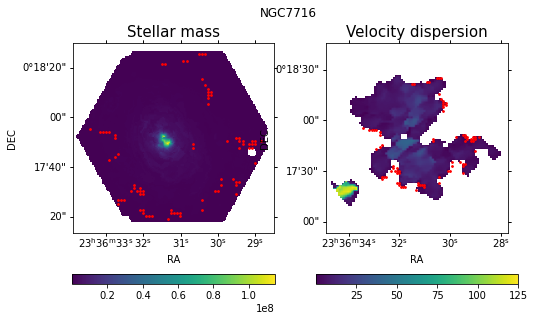

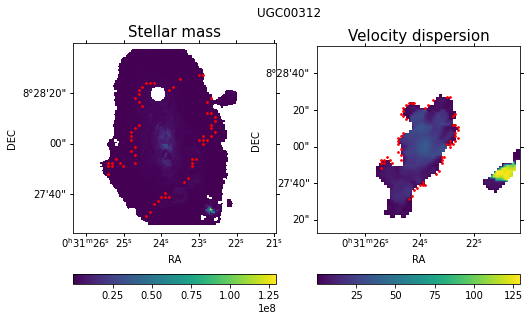

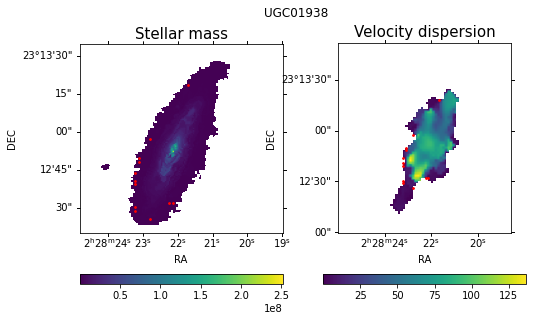

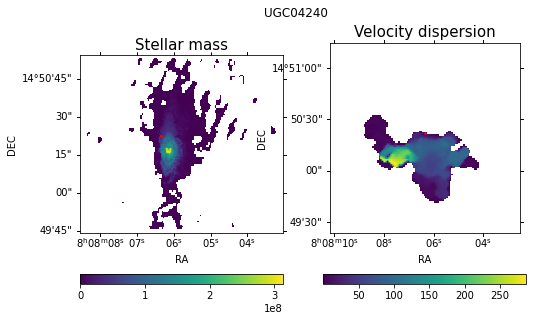

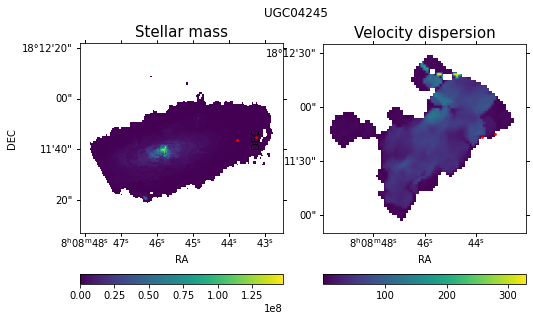

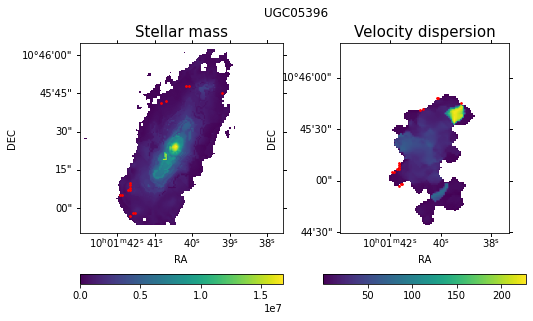

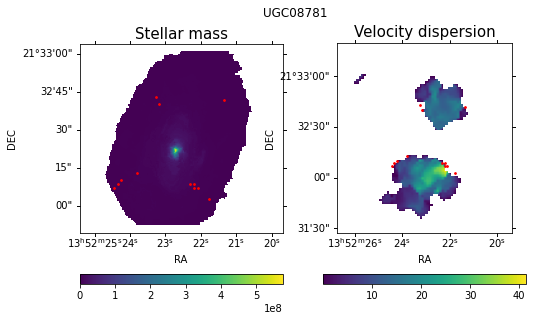

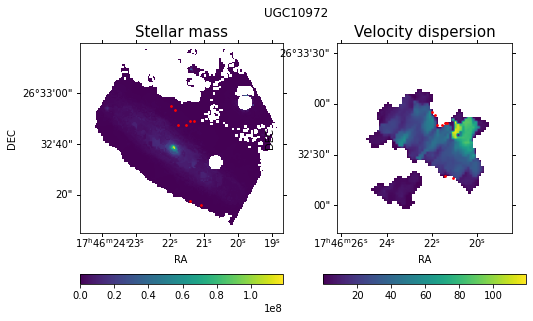

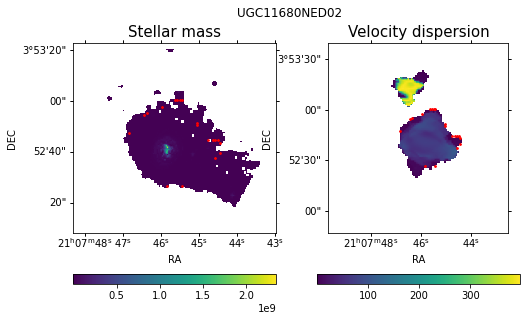

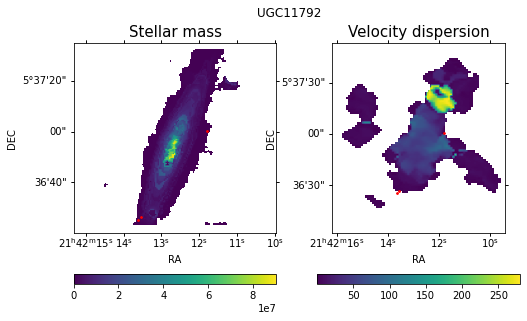

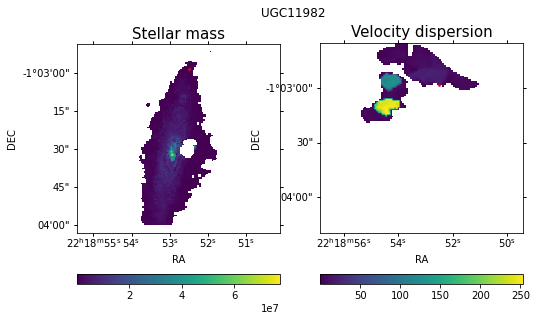

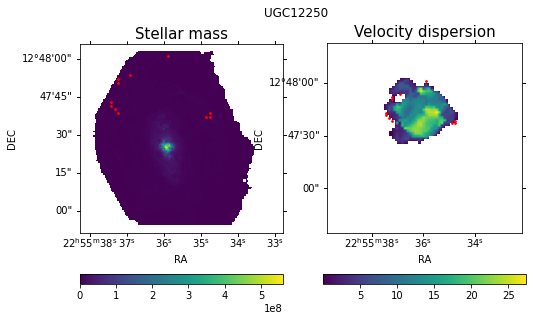

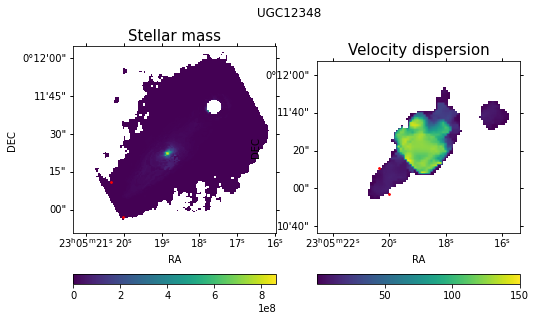

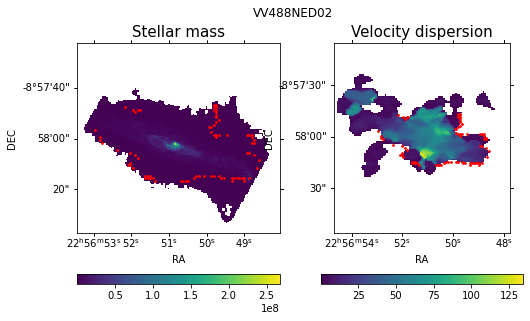

In [137]:
for source in low_vdisp_sources[:]:
    M_star, califa_hdr = get_data(califaoutpath+source+'_Mstar.fits',header=True)
    w_califa = WCS(califa_hdr)
    CO_vdisp, aca_hdr = get_data(acaoutpath+source+'map_2nd.fits',header=True)
    w_aca = WCS(aca_hdr)

    coords_world = np.array([low_vdisp.loc[low_vdisp['Source']==source,'RA'].to_numpy(),low_vdisp.loc[low_vdisp['Source']==source,'DEC'].to_numpy()]).T
    #print(coords_world.shape)
    coords_pixel1 = w_califa.all_world2pix(coords_world, 0).T
    #print(coords_pixel1.shape)
    coords_pixel2 = w_aca.all_world2pix(coords_world, 0).T

    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(1,2,1,projection=w_califa)
    ax2 = fig.add_subplot(1,2,2,projection=w_aca)
    for ax,frame,label,coords in zip([ax1,ax2],[M_star,CO_vdisp],
                              ['Stellar mass','Velocity dispersion'],[coords_pixel1,coords_pixel2]):
        im = ax.imshow(frame, origin='lower')
        fig.colorbar(im,ax=ax,orientation='horizontal')
        ax.scatter(coords[0],coords[1],c='r',s=3)#,label='ACA $R_e$')
        ax.set_title(label,fontsize=15)
        ax.coords['ra'].set_axislabel('RA')
        ax.coords['dec'].set_axislabel('DEC')
    fig.suptitle(source)
    plt.show()
    plt.close()

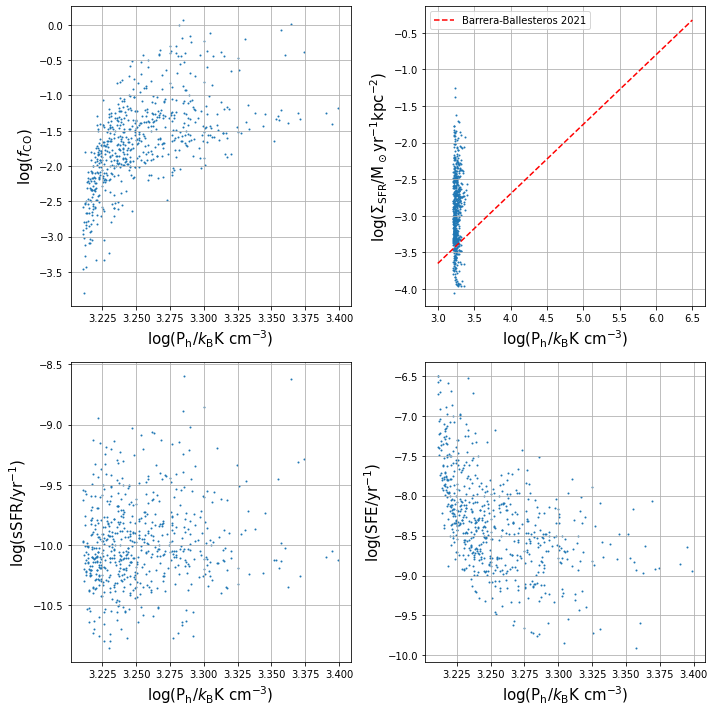

In [97]:
sample = Database_SF[np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp'])<6].copy()
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[sample['log_f_CO'],sample['log_S_SFR'],sample['log_sSFR'],sample['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.scatter(sample['log_P_h'],frame,s=1)
    #fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

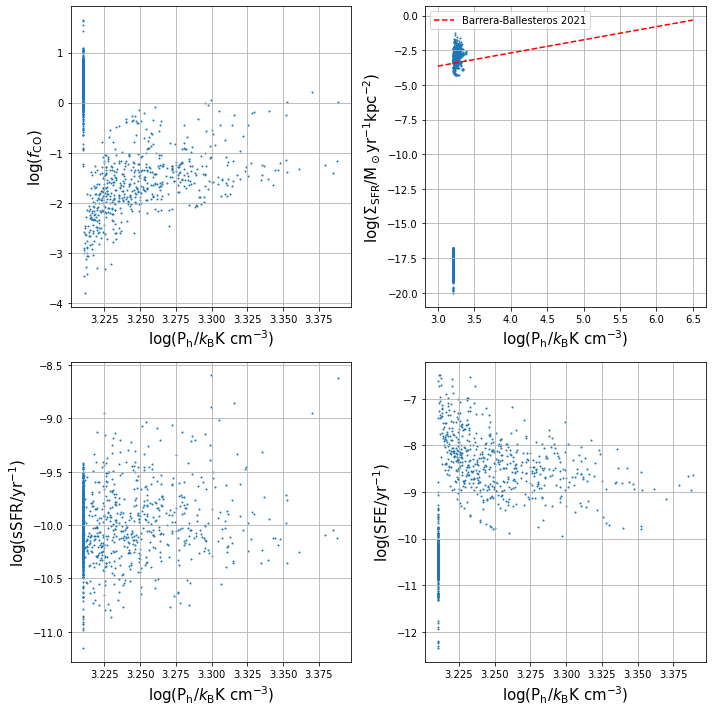

In [12]:
sample = Database_SF[np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp'])<6].copy()
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[sample['log_f_CO'],sample['log_S_SFR'],sample['log_sSFR'],sample['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.scatter(sample['log_P_h'],frame,s=1)
    #fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [39]:
Database_SF['log_S_Mstar'] = np.log10(Database_SF.loc[:,'S_Mstar'])
Database_SF['log_S_mol_O3N2'] = np.log10(Database_SF.loc[:,'S_mol_O3N2'])
Database_SF['log_P_h'] = np.log10(Database_SF.loc[:,'P_h'])
Database_SF['log_f_CO'] = np.log10(Database_SF.loc[:,'f_CO'])
Database_SF['log_S_SFR'] = np.log10(Database_SF.loc[:,'S_SFR'])
Database_SF['log_sSFR'] = np.log10(Database_SF.loc[:,'sSFR'])
Database_SF['log_SFE'] = np.log10(Database_SF.loc[:,'SFE'])

In [4]:
Database_SF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20930 entries, 1946 to 87338
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Source        20930 non-null  object  
 1   Final_QS      20930 non-null  category
 2   Final_NA      20930 non-null  category
 3   Inclination   20930 non-null  int64   
 4   Re_kpc        20930 non-null  float64 
 5   PA            20930 non-null  int64   
 6   RA            20930 non-null  float64 
 7   DEC           20930 non-null  float64 
 8   Rgal_kpc      20930 non-null  float64 
 9   T_gal         20930 non-null  float64 
 10  S_Mstar       20930 non-null  float64 
 11  S_SFR         20930 non-null  float64 
 12  Ha_mask       20930 non-null  float64 
 13  R_21          20930 non-null  float64 
 14  Z_O3N2        20698 non-null  float64 
 15  Z_N2          20918 non-null  float64 
 16  alphaCO_O3N2  20698 non-null  float64 
 17  alphaCO_N2    20918 non-null  float64 
 18  S_mol_O3

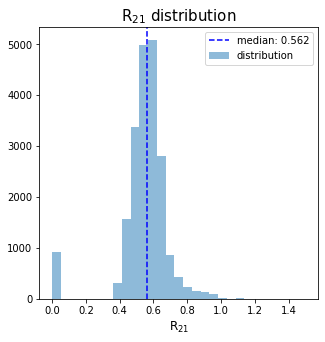

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
#for ax,O3N2,N2,title in zip(axs.ravel(),[alphaCO_O3N2,alphaCO_O3N2_rep],[alphaCO_N2,alphaCO_N2_rep],['Original maps','Reprojected maps']):
ax.hist(Database_SF['R_21'],bins=np.linspace(0,1.5,30),alpha=0.5,label=r'distribution')
median = np.nanmedian(Database_SF['R_21'])
ax.axvline(median,ls='--',c='b',label=f'median: {median:.3}')
ax.set_xlabel(r'R$_\mathrm{21}$',size=12)
ax.set_title(r'R$_\mathrm{21}$ distribution',size=15)
ax.legend(loc='best')
#ax.set_yscale('log')
plt.show()

In [6]:
alphaCO_MW = 4.3

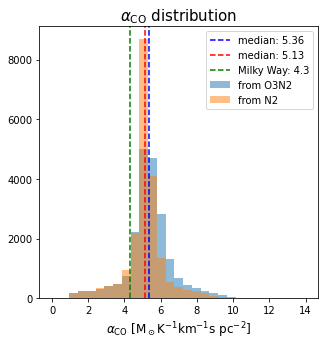

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(Database_SF['alphaCO_O3N2'],bins=np.linspace(0.,14,30),alpha=0.5,label='from O3N2')
median1 = np.nanmedian(Database_SF['alphaCO_O3N2'])
ax.axvline(median1,ls='--',c='b',label=f'median: {median1:.3}')
ax.hist(Database_SF['alphaCO_N2'],bins=np.linspace(0.,14,30),alpha=0.5,label='from N2')
median2 = np.nanmedian(Database_SF['alphaCO_N2'])
ax.axvline(median2,ls='--',c='r',label=f'median: {median2:.3}')
ax.axvline(alphaCO_MW,ls='--',c='g',label=f'Milky Way: {alphaCO_MW:.3}')
ax.set_xlabel(r'$\alpha_\mathrm{CO}$ [M$_\odot$K$^{-1}$km$^{-1}$s pc$^{-2}$]',size=12)
ax.set_title(r'$\alpha_\mathrm{CO}$ distribution',size=15)
ax.legend(loc='best')
#ax.set_yscale('log')
plt.show()

In [40]:
Database_SF['Rgal_Re'] = Database_SF['Rgal_kpc']/Database_SF['Re_kpc']

In [74]:
sorted_Rgal = Database_SF[['Source','Rgal_Re']].copy().sort_values('Rgal_Re',ascending=False)

In [81]:
sorted_Rgal['Source']

6236     MCG-01-01-012
6237     MCG-01-01-012
6150     MCG-01-01-012
6702     MCG-01-01-012
6703     MCG-01-01-012
             ...      
75962    UGC11680NED02
60494         UGC00312
76007    UGC11680NED02
76008    UGC11680NED02
56067          NGC7625
Name: Source, Length: 20930, dtype: object

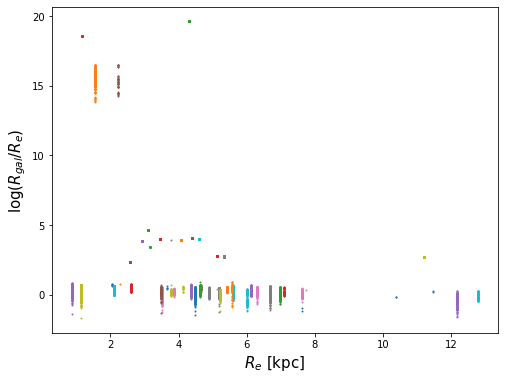

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
for source in sources:
    ax.scatter(Database_SF.loc[Database_SF['Source']==source,'Re_kpc'],np.log10(Database_SF.loc[Database_SF['Source']==source,'Rgal_Re']),s=1,label=source)
#cutoff = 10**19
#im = ax.hexbin(Database_SF.loc[Database_SF['Rgal_Re']<cutoff,'Rgal_Re'],np.log10(Database_SF.loc[Database_SF['Rgal_Re']<cutoff,'P_h']),mincnt=1)
ax.set_xlabel('$R_e$ [kpc]',size=15)
ax.set_ylabel('log($R_{gal}$/$R_e$)',size=15)
#ax.legend(loc='best')
plt.show()

In [115]:
groupedby_source = Database_SF.groupby('Source')
medianby_source = groupedby_source[['Re_kpc','Rgal_Re','Inclination']].median()

In [97]:
medianby_source.sort_values('Rgal_Re',ascending=False,inplace=True)

In [107]:
groupedby_source.count()

Final_QS  Final_NA  Inclination    PA  Re_kpc    RA   DEC  \
Source                                                                     
IC1079                2         2            2     2       2     2     2   
IC1528             1568      1568         1568  1568    1568  1568  1568   
MCG-01-01-012        34        34           34    34      34    34    34   
MCG-01-10-015       317       317          317   317     317   317   317   
MCG-02-02-030       724       724          724   724     724   724   724   
MCG-02-51-004       449       449          449   449     449   449   449   
NGC0001             932       932          932   932     932   932   932   
NGC0155               1         1            1     1       1     1     1   
NGC0169              78        78           78    78      78    78    78   
NGC0171             469       469          469   469     469   469   469   
NGC0180             453       453          453   453     453   453   453   
NGC0693             813       813          813   813     813   813   813   
NGC0768             336       336          336   336     336   336   336   
NGC0955              24        24           24    24      24    24    24   
NGC1056             622       622          622   622     622   622   622   
NGC1542              42        42           42    42      42    42    42   
NGC2449             201       201          201   201     201   201   201   
NGC2540             432       432          432   432     432   432   432   
NGC2554              14        14           14    14      14    14    14   
NGC2595             677       677          677   677     677   677   677   
NGC3300               6         6            6     6       6     6     6   
NGC6427               1         1            1     1       1     1     1   
NGC7025              23        23           23    23      23    23    23   
NGC7311             323       323          323   323     323   323   323   
NGC7321             662       662          662   662     662   662   662   
NGC7364            1327      1327         1327  1327    1327  1327  1327   
NGC7466             292       292          292   292     292   292   292   
NGC7489             885       885          885   885     885   885   885   
NGC7625             830       830          830   830     830   830   830   
NGC7716            1207      1207         1207  1207    1207  1207  1207   
UGC00312            960       960          960   960     960   960   960   
UGC00335NED02         1         1            1     1       1     1     1   
UGC01123             16        16           16    16      16    16    16   
UGC01368             93        93           93    93      93    93    93   
UGC01938            351       351          351   351     351   351   351   
UGC02099              8         8            8     8       8     8     8   
UGC04240             98        98           98    98      98    98    98   
UGC04245            258       258          258   258     258   258   258   
UGC04455            493       493          493   493     493   493   493   
UGC05396            578       578          578   578     578   578   578   
UGC08322              4         4            4     4       4     4     4   
UGC08781            271       271          271   271     271   271   271   
UGC10972            228       228          228   228     228   228   228   
UGC11649            190       190          190   190     190   190   190   
UGC11680NED02       365       365          365   365     365   365   365   
UGC11792            193       193          193   193     193   193   193   
UGC11958              1         1            1     1       1     1     1   
UGC11982            520       520          520   520     520   520   520   
UGC12224            806       806          806   806     806   806   806   
UGC12250            374       374          374   374     374   374   374   
UGC12274              2         2            2     2       2   

In [116]:
medianby_source[medianby_source['Rgal_Re']>10]

Re_kpc       Rgal_Re  Inclination
Source                                             
IC1528          4.062060  9.043802e+03         70.0
MCG-01-01-012   4.296295  4.131474e+19         90.0
MCG-01-10-015   3.454377  1.015875e+04         73.0
MCG-02-02-030   2.930599  7.322936e+03         70.0
MCG-02-51-004   4.383835  1.143380e+04         68.0
NGC0155         3.773986  8.684208e+03         40.0
NGC0171         4.613204  9.670811e+03         33.0
NGC0693         1.541799  1.387178e+16         90.0
NGC0955         1.153294  3.721450e+18         90.0
NGC1542         2.211417  1.966275e+15         90.0
NGC7364         2.577177  2.390664e+02         54.0
UGC01123        3.172096  2.824444e+03         75.0
UGC04455       11.204086  4.945155e+02         47.0
UGC11649        5.131567  5.939728e+02         42.0
UGC11982        5.338409  5.630371e+02         78.0
VV488NED02      3.091502  4.792352e+04         82.0

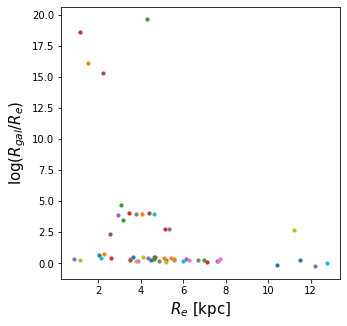

In [101]:
fig, ax = plt.subplots(figsize=(5,5))
for source in sources:
    ax.scatter(medianby_source.loc[source,'Re_kpc'],np.log10(medianby_source.loc[source,'Rgal_Re']),s=10,label=source)
#cutoff = 10**19
#im = ax.hexbin(medianby_source.loc[medianby_source['Rgal_Re']<cutoff,'Rgal_Re'],np.log10(medianby_source.loc[medianby_source['Rgal_Re']<cutoff,'P_h']),mincnt=1)
ax.set_xlabel('$R_e$ [kpc]',size=15)
ax.set_ylabel('log($R_{gal}$/$R_e$)',size=15)
#ax.legend(loc='best')
plt.show()

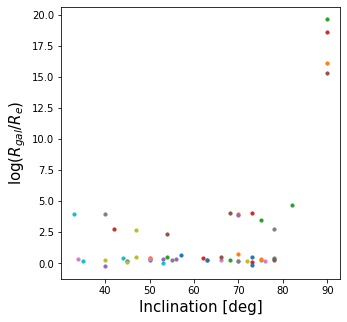

In [102]:
fig, ax = plt.subplots(figsize=(5,5))
for source in sources:
    ax.scatter(medianby_source.loc[source,'Inclination'],np.log10(medianby_source.loc[source,'Rgal_Re']),s=10,label=source)
#cutoff = 10**19
#im = ax.hexbin(medianby_source.loc[medianby_source['Rgal_Re']<cutoff,'Rgal_Re'],np.log10(medianby_source.loc[medianby_source['Rgal_Re']<cutoff,'P_h']),mincnt=1)
ax.set_xlabel('Inclination [deg]',size=15)
ax.set_ylabel('log($R_{gal}$/$R_e$)',size=15)
#ax.legend(loc='best')
plt.show()

In [59]:
sources = np.unique(Database_SF['Source'])

In [8]:
A = 0.3
b = 0.95

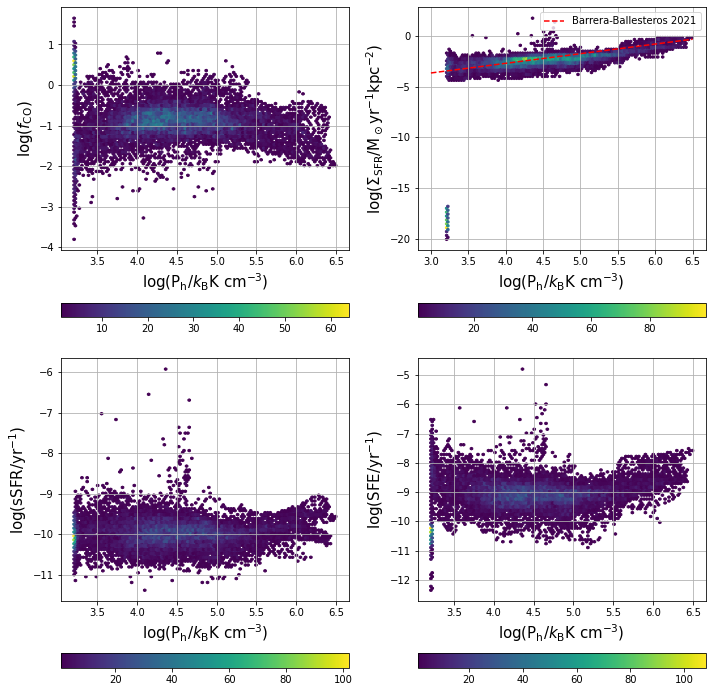

In [11]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[Database_SF['log_f_CO'],Database_SF['log_S_SFR'],Database_SF['log_sSFR'],Database_SF['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF['log_P_h'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

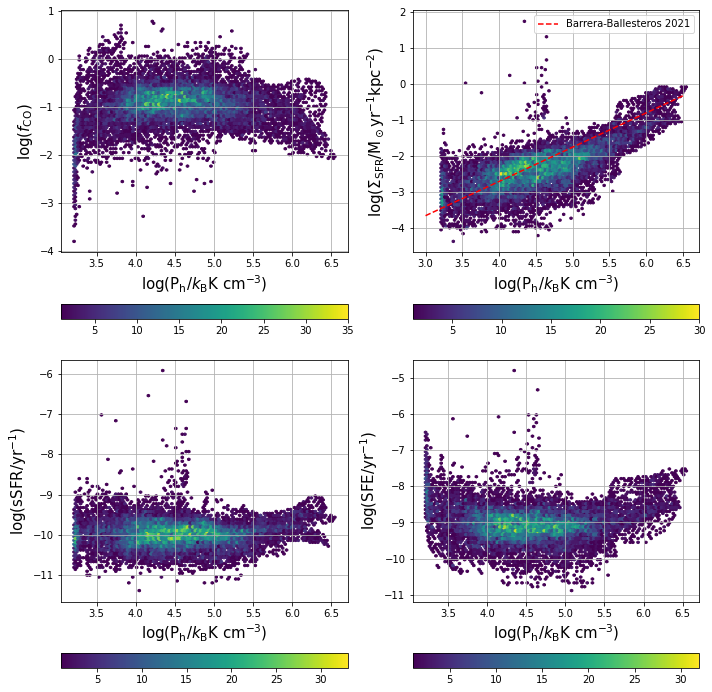

In [18]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[Database_SF['log_f_CO'],Database_SF['log_S_SFR'],Database_SF['log_sSFR'],Database_SF['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF['log_P_h'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

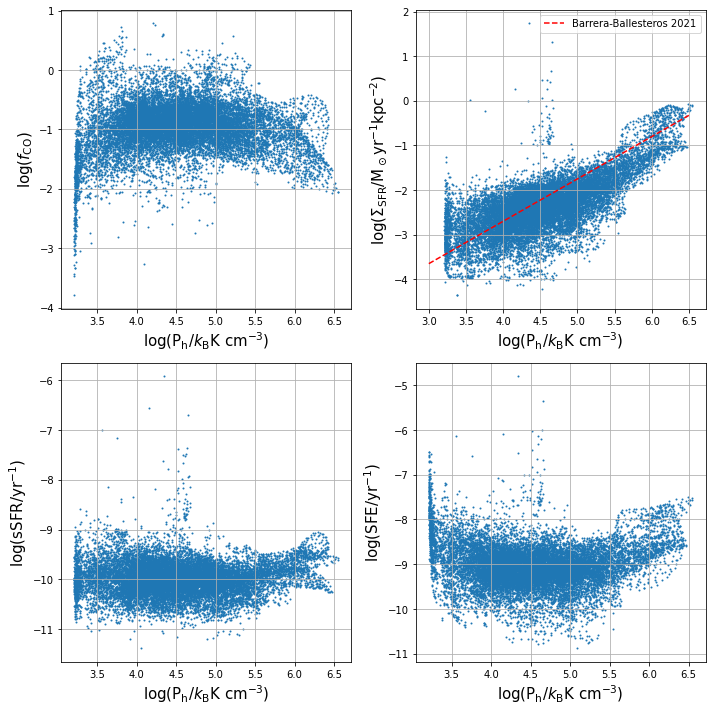

In [40]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[Database_SF['log_f_CO'],Database_SF['log_S_SFR'],Database_SF['log_sSFR'],Database_SF['log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.scatter(Database_SF['log_P_h'],frame,s=1)
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

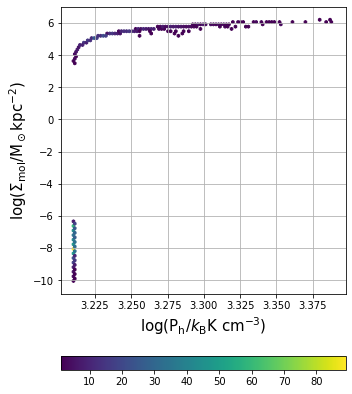

In [13]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.hexbin(sample['log_P_h'],sample['log_S_mol_O3N2'],mincnt=1)
fig.colorbar(im,ax=ax,orientation='horizontal')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

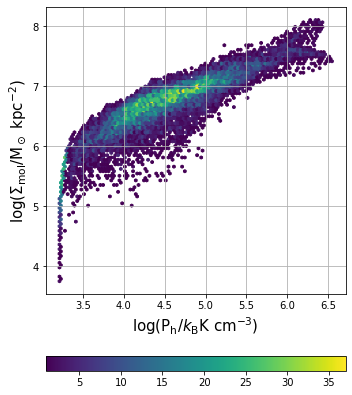

In [24]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.hexbin(Database_SF['log_P_h'],Database_SF['log_S_mol_O3N2'],mincnt=1)
fig.colorbar(im,ax=ax,orientation='horizontal')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [65]:
np.nanmin(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp'])

0.7072193165902746

In [80]:
np.nanmin(Database_SF['S_Mstar'])

-64762802.07252482

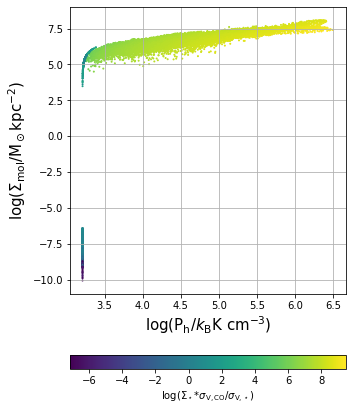

In [14]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_mol_O3N2'],s=1,c=np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp']))
fig.colorbar(im,ax=ax,orientation='horizontal',label='log($\Sigma_\star$*$\sigma_\mathrm{V,CO}$/$\sigma_\mathrm{V,\star}$)')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
#ax.set_xlim(3.25,3.3)
#ax.set_ylim(5.5,6)
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

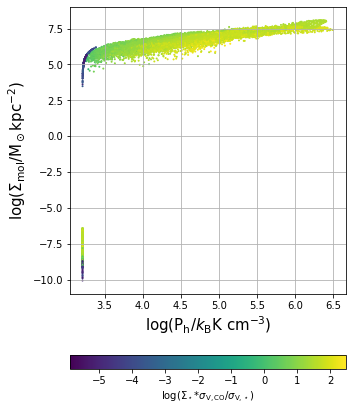

In [172]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_mol_O3N2'],s=1,c=np.log10(Database_SF['CO_vdisp']))
fig.colorbar(im,ax=ax,orientation='horizontal',label='log($\Sigma_\star$*$\sigma_\mathrm{V,CO}$/$\sigma_\mathrm{V,\star}$)')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
#ax.set_xlim(3.25,3.3)
#ax.set_ylim(5.5,6)
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

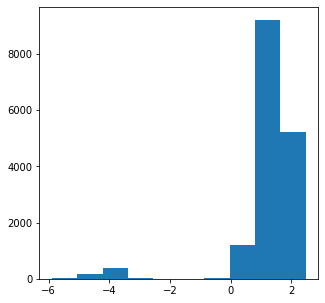

In [173]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(np.log10(Database_SF['CO_vdisp']))
plt.show()

In [113]:
np.unique(Database_SF.loc[Database_SF['log_S_mol_O3N2']<2,'Source'])

array(['MCG-01-01-012', 'NGC0693', 'NGC0955', 'NGC1542'], dtype=object)

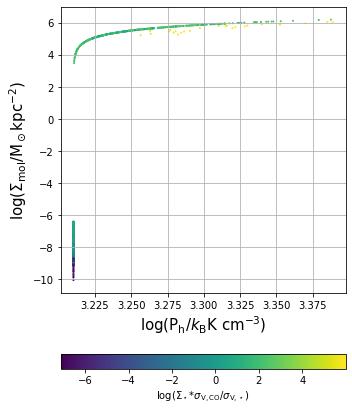

In [15]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.scatter(sample['log_P_h'],sample['log_S_mol_O3N2'],s=1,c=np.log10(sample['S_Mstar']*sample['CO_vdisp']/sample['star_vdisp']))
fig.colorbar(im,ax=ax,orientation='horizontal',label='log($\Sigma_\star$*$\sigma_\mathrm{V,CO}$/$\sigma_\mathrm{V,\star}$)')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
#ax.set_xlim(3.25,3.3)
#ax.set_ylim(5.5,6)
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

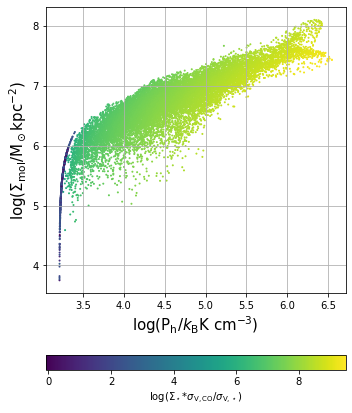

In [66]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_mol_O3N2'],s=1,c=np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp']))
fig.colorbar(im,ax=ax,orientation='horizontal',label='log($\Sigma_\star$*$\sigma_\mathrm{V,CO}$/$\sigma_\mathrm{V,\star}$)')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
#ax.set_xlim(3.25,3.3)
#ax.set_ylim(5.5,6)
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

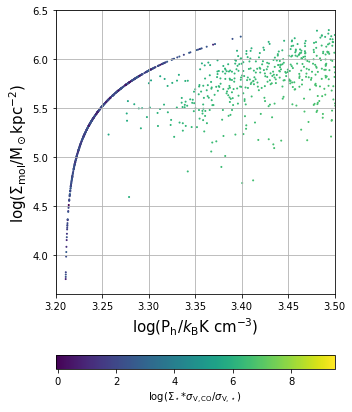

In [67]:
fig, ax = plt.subplots(figsize=(5,6))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_mol_O3N2'],s=1,c=np.log10(Database_SF['S_Mstar']*Database_SF['CO_vdisp']/Database_SF['star_vdisp']))
fig.colorbar(im,ax=ax,orientation='horizontal',label='log($\Sigma_\star$*$\sigma_\mathrm{V,CO}$/$\sigma_\mathrm{V,\star}$)')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
ax.set_xlim(3.2,3.5)
ax.set_ylim(3.6,6.5)
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

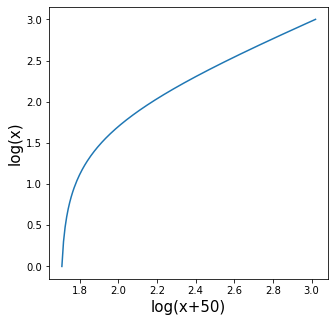

In [74]:
c = 50
x = np.arange(1,1000)
y = x + c
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.log10(y),np.log10(x))
ax.set_xlabel(f'log(x+{c})',size=15)
ax.set_ylabel('log(x)',size=15)
plt.show()

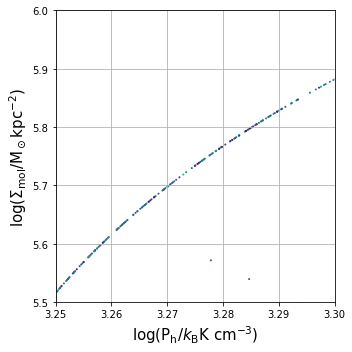

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_mol_O3N2'],s=1,c=Database_SF['log_S_Mstar'])
#fig.colorbar(im,ax=ax,orientation='horizontal')
ax.set_ylabel(r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
#ax.set_xlim(3.2,3.5)
#ax.set_ylim(ymax=6.5)
ax.set_xlim(3.25,3.3)
ax.set_ylim(5.5,6)
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

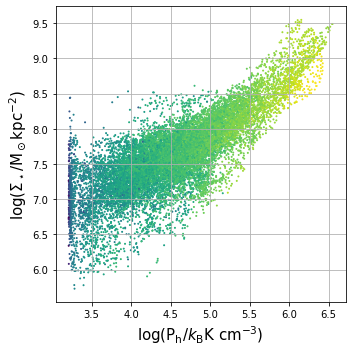

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_Mstar'],s=1,c=Database_SF['log_S_mol_O3N2'])
#im = ax.hexbin(Database_SF.loc[Database_SF['log_S_mol_O3N2']<6,'log_P_h'],Database_SF.loc[Database_SF['log_S_mol_O3N2']<6,'log_S_Mstar'],mincnt=1)
#fig.colorbar(im,ax=ax,orientation='horizontal')
ax.set_ylabel(r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

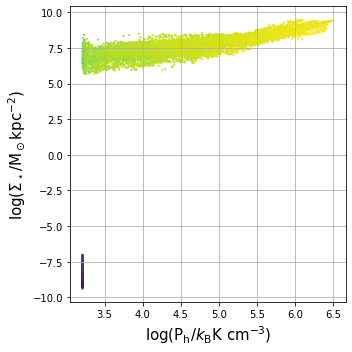

In [114]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.scatter(Database_SF['log_P_h'],Database_SF['log_S_Mstar'],s=1,c=Database_SF['log_S_mol_O3N2'])
#im = ax.hexbin(Database_SF.loc[Database_SF['log_S_mol_O3N2']<6,'log_P_h'],Database_SF.loc[Database_SF['log_S_mol_O3N2']<6,'log_S_Mstar'],mincnt=1)
#fig.colorbar(im,ax=ax,orientation='horizontal')
ax.set_ylabel(r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',size=15)
ax.grid(True)
ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


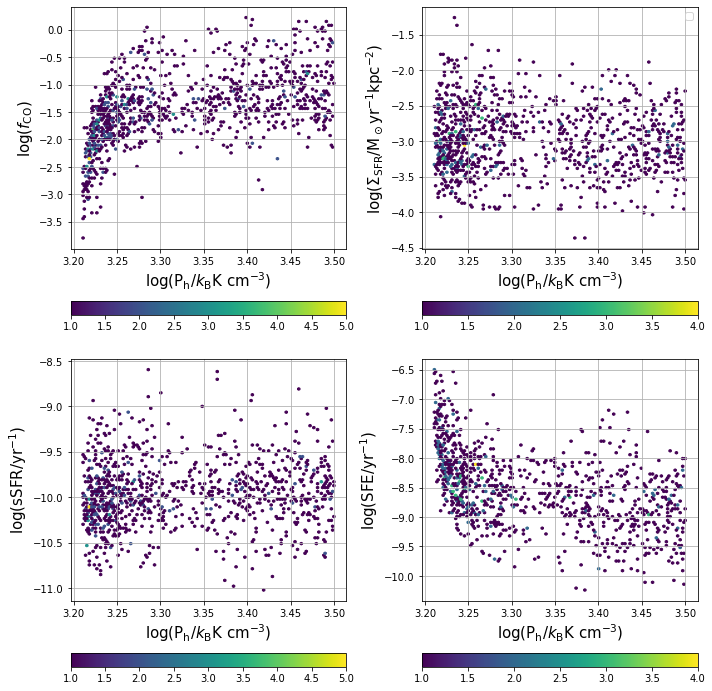

In [21]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,frame,title,label in zip(axs.ravel(),[Database_SF.loc[Database_SF['log_P_h']<3.5,'log_f_CO'],Database_SF.loc[Database_SF['log_P_h']<3.5,'log_S_SFR'],Database_SF.loc[Database_SF['log_P_h']<3.5,'log_sSFR'],Database_SF.loc[Database_SF['log_P_h']<3.5,'log_SFE']],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF.loc[Database_SF['log_P_h']<3.5,'log_P_h'],frame,mincnt=1)
    fig.colorbar(im,ax=ax,orientation='horizontal')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    
#axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [19]:
def create_bins(number,bin_width=1):
    q = np.floor(number/bin_width)
    return q*bin_width

In [21]:
Ph_binwidth = 0.5
grouped_Ph = Database_SF.groupby(create_bins(Database_SF.loc[:,'log_P_h'],Ph_binwidth))
means_Ph = grouped_Ph[['log_S_Mstar','log_S_SFR','R_21','Z_O3N2','Z_N2','alphaCO_O3N2','alphaCO_N2','log_S_mol_O3N2','CO_vdisp','star_vdisp','log_f_CO','log_sSFR','log_SFE','log_P_h']].mean()
medians_Ph = grouped_Ph[['log_S_Mstar','log_S_SFR','R_21','Z_O3N2','Z_N2','alphaCO_O3N2','alphaCO_N2','log_S_mol_O3N2','CO_vdisp','star_vdisp','log_f_CO','log_sSFR','log_SFE','log_P_h']].median()

In [22]:
S_SFR_binwidth = 1.
grouped_SSFR = Database_SF.groupby(create_bins(Database_SF.loc[:,'log_S_SFR'],S_SFR_binwidth))
means_SSFR = grouped_SSFR[['log_S_Mstar','log_S_SFR','R_21','Z_O3N2','Z_N2','alphaCO_O3N2','alphaCO_N2','log_S_mol_O3N2','CO_vdisp','star_vdisp','log_f_CO','log_sSFR','log_SFE','log_P_h']].mean()
medians_SSFR = grouped_SSFR[['log_S_Mstar','log_S_SFR','R_21','Z_O3N2','Z_N2','alphaCO_O3N2','alphaCO_N2','log_S_mol_O3N2','CO_vdisp','star_vdisp','log_f_CO','log_sSFR','log_SFE','log_P_h']].median()

In [38]:
popt, cov = np.polyfit(Database_SF.loc[np.isfinite(Database_SF['log_P_h'])&np.isfinite(Database_SF['log_S_SFR']),'log_P_h'],
                       Database_SF.loc[np.isfinite(Database_SF['log_P_h'])&np.isfinite(Database_SF['log_S_SFR']),'log_S_SFR'],deg=1,cov=True)

In [39]:
print(popt)

[ 0.65550289 -5.31823066]


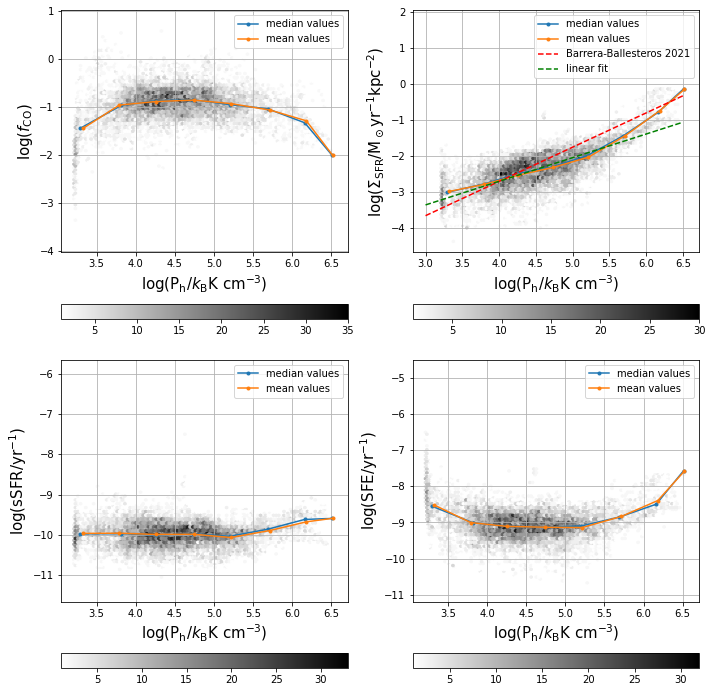

In [42]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,name,label in zip(axs.ravel(),['log_f_CO','log_S_SFR','log_sSFR','log_SFE'],
                               [r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF['log_P_h'],Database_SF[name],mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    #print(stacked['P_h'].shape,frame.shape)
    ax.plot(medians_Ph['log_P_h'].to_numpy(),medians_Ph[name].to_numpy(),marker='.',label='median values')
    ax.plot(means_Ph['log_P_h'].to_numpy(),means_Ph[name].to_numpy(),marker='.',label='mean values')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    ax.legend(loc='best')
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].plot([3.,6.5],[popt[0]*(3.)+popt[1],popt[0]*(6.5)+popt[1]],c='g',ls='--',label='linear fit')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

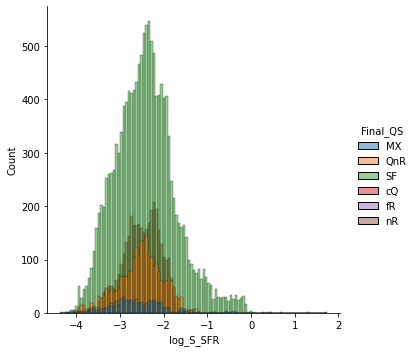

In [50]:
sns.displot(Database_SF, x="log_S_SFR",hue="Final_QS")#,  kind="kde")#hue="Final_QS",

In [58]:
arr = Database_SF["log_S_SFR"].to_numpy()

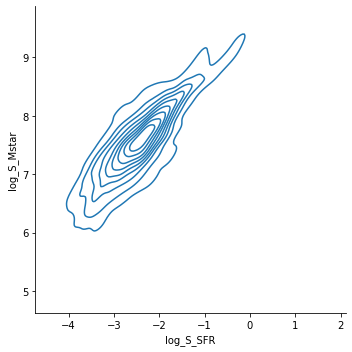

In [66]:
sns.displot(Database_SF, x="log_S_SFR", y="log_S_Mstar", kind="kde")

/users/brodriguez/.local/lib/python3.10/site-packages/seaborn/distributions.py:1176: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


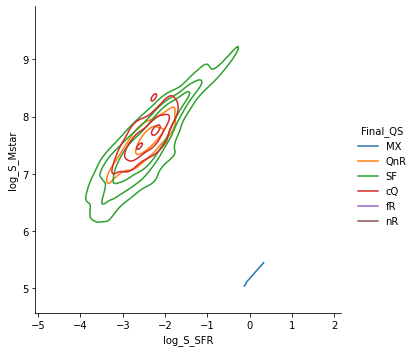

In [70]:
sns.displot(Database_SF, x="log_S_SFR", y="log_S_Mstar", kind="kde",levels=[.25,.5,.75],hue="Final_QS")

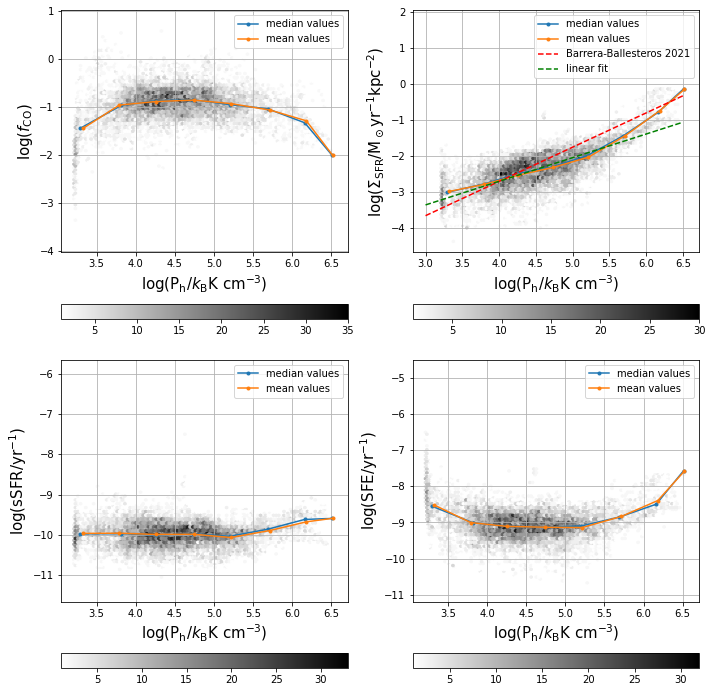

In [42]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,name,label in zip(axs.ravel(),['log_f_CO','log_S_SFR','log_sSFR','log_SFE'],
                               [r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(Database_SF['log_P_h'],Database_SF[name],mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    #print(stacked['P_h'].shape,frame.shape)
    ax.plot(medians_Ph['log_P_h'].to_numpy(),medians_Ph[name].to_numpy(),marker='.',label='median values')
    ax.plot(means_Ph['log_P_h'].to_numpy(),means_Ph[name].to_numpy(),marker='.',label='mean values')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    ax.legend(loc='best')
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].plot([3.,6.5],[popt[0]*(3.)+popt[1],popt[0]*(6.5)+popt[1]],c='g',ls='--',label='linear fit')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [91]:
S_SFR_binwidth = 1.
grouped_fCO = Database_SF.groupby(create_bins(Database_SF.loc[:,'log_f_CO'],0.5))
medians_fCO = grouped_fCO[['log_f_CO','log_S_SFR']].median()
grouped_Mstar = Database_SF.groupby(create_bins(Database_SF.loc[:,'log_S_Mstar'],0.5))
medians_Mstar = grouped_Mstar[['log_S_Mstar','log_S_SFR']].median()
grouped_Smol = Database_SF.groupby(create_bins(Database_SF.loc[:,'log_S_mol_O3N2'],0.5))
medians_Smol = grouped_Smol[['log_S_SFR','log_S_mol_O3N2']].median()

In [97]:
#S_SFR_binwidth = 1.
#grouped_QS = Database_SF.groupby([Database_SF.loc[:,'Final_QS'],create_bins(np.log10(Database_SF.loc[:,'P_h']),P_binwidth)])
grouped_fCO_QS = Database_SF.groupby([Database_SF.loc[:,'Final_QS'],create_bins(Database_SF.loc[:,'log_f_CO'],0.5)])
medians_fCO_QS = grouped_fCO_QS[['log_f_CO','log_S_SFR']].median()
grouped_Mstar_QS = Database_SF.groupby([Database_SF.loc[:,'Final_QS'],create_bins(Database_SF.loc[:,'log_S_Mstar'],0.5)])
medians_Mstar_QS = grouped_Mstar_QS[['log_S_Mstar','log_S_SFR']].median()
grouped_Smol_QS = Database_SF.groupby([Database_SF.loc[:,'Final_QS'],create_bins(Database_SF.loc[:,'log_S_mol_O3N2'],0.5)])
medians_Smol_QS = grouped_Smol_QS[['log_S_SFR','log_S_mol_O3N2']].median()
grouped_Ph_QS = Database_SF.groupby([Database_SF.loc[:,'Final_QS'],create_bins(Database_SF.loc[:,'log_P_h'],0.5)])
medians_Ph_QS = grouped_Ph_QS[['log_S_SFR','log_P_h']].median()

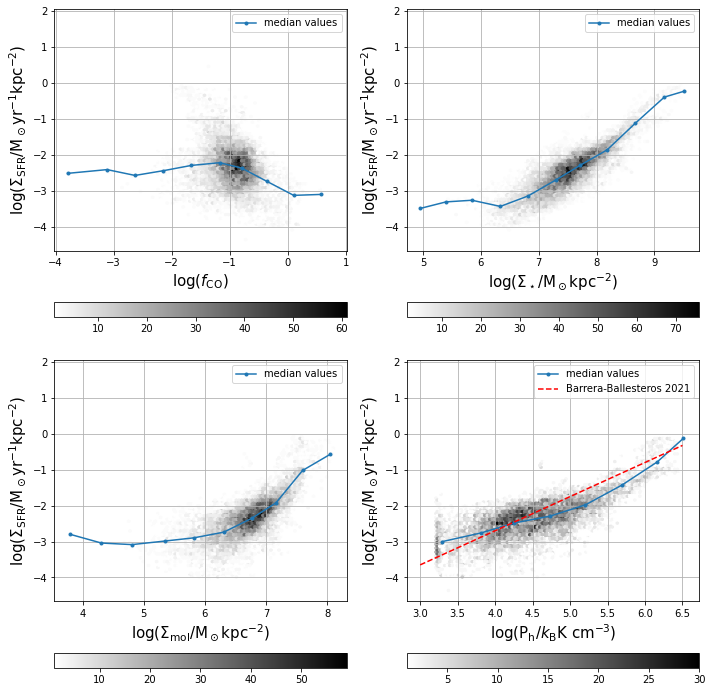

In [93]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,name,label,medians in zip(axs.ravel(),['log_f_CO','log_S_Mstar','log_S_mol_O3N2','log_P_h'],
                          [r'log($f_\mathrm{CO}$)',r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)'],
                           [medians_fCO,medians_Mstar,medians_Smol,medians_Ph]):
    im = ax.hexbin(Database_SF[name],Database_SF['log_S_SFR'],mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    #print(stacked['P_h'].shape,frame.shape)
    #ax.plot(medians_SSFR[name].to_numpy(),medians_SSFR['log_S_SFR'].to_numpy(),marker='.',label='median values')
    ax.plot(medians[name].to_numpy(),medians['log_S_SFR'].to_numpy(),marker='.',label='median values')
    #ax.plot(np.log10(mean_stacked[name].to_numpy()),np.log10(mean_stacked['S_SFR'].to_numpy()),marker='.',label='mean values')
    ax.set_xlabel(label,size=15)
    ax.grid(True)
    ax.set_ylabel(r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',size=15)
    ax.legend(loc='best')
axs[1,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[1,1].legend(loc='best')
fig.tight_layout()
plt.show()

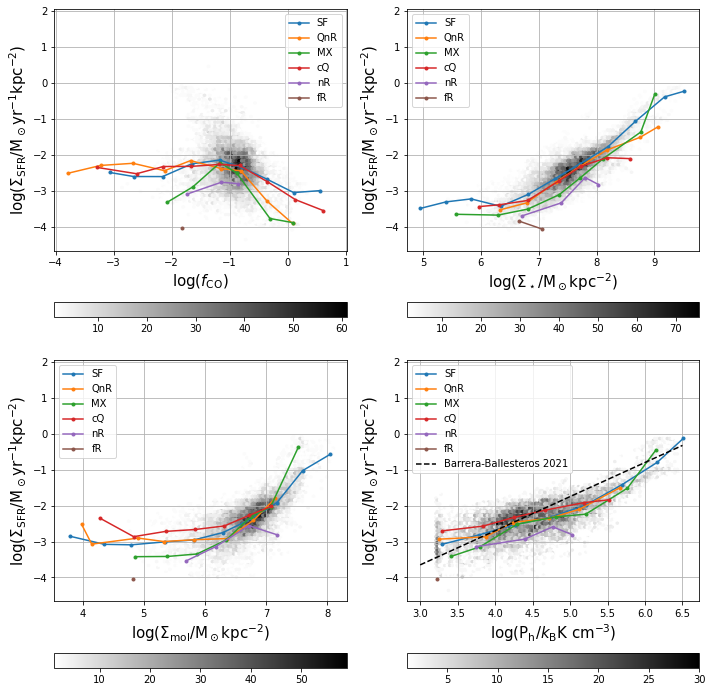

In [100]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,name,label,medians in zip(axs.ravel(),['log_f_CO','log_S_Mstar','log_S_mol_O3N2','log_P_h'],
                          [r'log($f_\mathrm{CO}$)',r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)'],
                           [medians_fCO_QS,medians_Mstar_QS,medians_Smol_QS,medians_Ph_QS]):
    im = ax.hexbin(Database_SF[name],Database_SF['log_S_SFR'],mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    #print(stacked['P_h'].shape,frame.shape)
    for QS in ['SF','QnR','MX','cQ','nR','fR']:
        ax.plot(medians.loc[(QS,),name].to_numpy(),medians.loc[(QS,),'log_S_SFR'].to_numpy(),marker='.',label=QS)
    #ax.plot(medians[name].to_numpy(),medians['log_S_SFR'].to_numpy(),marker='.',label='median values')
    ax.set_xlabel(label,size=15)
    ax.grid(True)
    ax.set_ylabel(r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',size=15)
    ax.legend(loc='best')
axs[1,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='k',ls='--',label='Barrera-Ballesteros 2021')
axs[1,1].legend(loc='best')
fig.tight_layout()
plt.show()

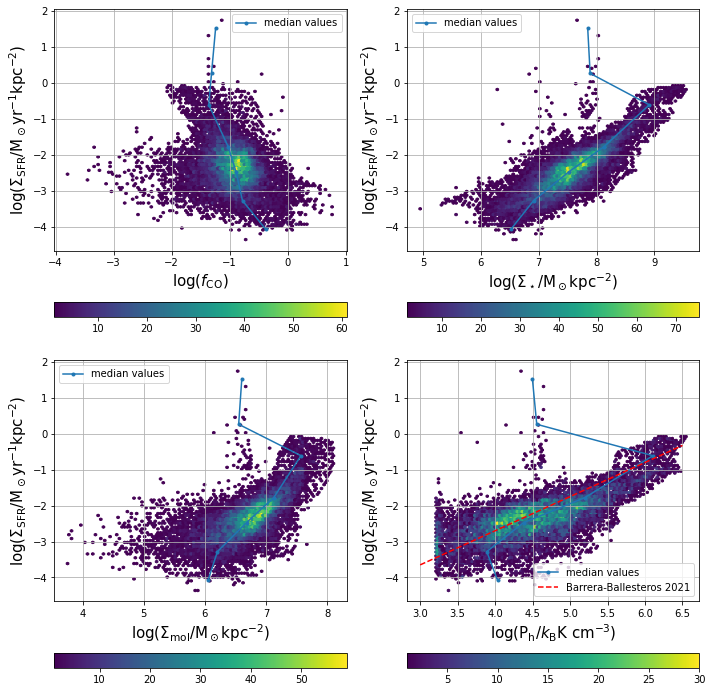

In [88]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,name,label in zip(axs.ravel(),['log_f_CO','log_S_Mstar','log_S_mol_O3N2','log_P_h'],
                          [r'log($f_\mathrm{CO}$)',r'log($\Sigma_\star$/M$_\odot$kpc$^{-2}$)',r'log($\Sigma_\mathrm{mol}$/M$_\odot$kpc$^{-2}$)',r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)']):
    im = ax.hexbin(Database_SF[name],Database_SF['log_S_SFR'],mincnt=1)#,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    #print(stacked['P_h'].shape,frame.shape)
    ax.plot(medians_SSFR[name].to_numpy(),medians_SSFR['log_S_SFR'].to_numpy(),marker='.',label='median values')
    #ax.plot(np.log10(mean_stacked[name].to_numpy()),np.log10(mean_stacked['S_SFR'].to_numpy()),marker='.',label='mean values')
    ax.set_xlabel(label,size=15)
    ax.grid(True)
    ax.set_ylabel(r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',size=15)
    ax.legend(loc='best')
axs[1,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[1,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [226]:
def get_2dhist(xarr,yarr):
    H, xedges, yedges = np.histogram2d(xarr,yarr,bins=[np.linspace(np.nanmin(xarr),np.nanmax(xarr),51),np.linspace(np.nanmin(yarr),np.nanmax(yarr),51)])
    X = [(xedges[i]+xedges[i-1])/2 for i in range(1,len(xedges))]
    Y = [(yedges[i]+yedges[i-1])/2 for i in range(1,len(yedges))]
    return H.T, X, Y

In [176]:
histograms = {name:get_2dhist(np.log10(Database_SF['P_h']),np.log10(Database_SF[name])) for name in ['f_CO','S_SFR','sSFR','SFE']}

/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


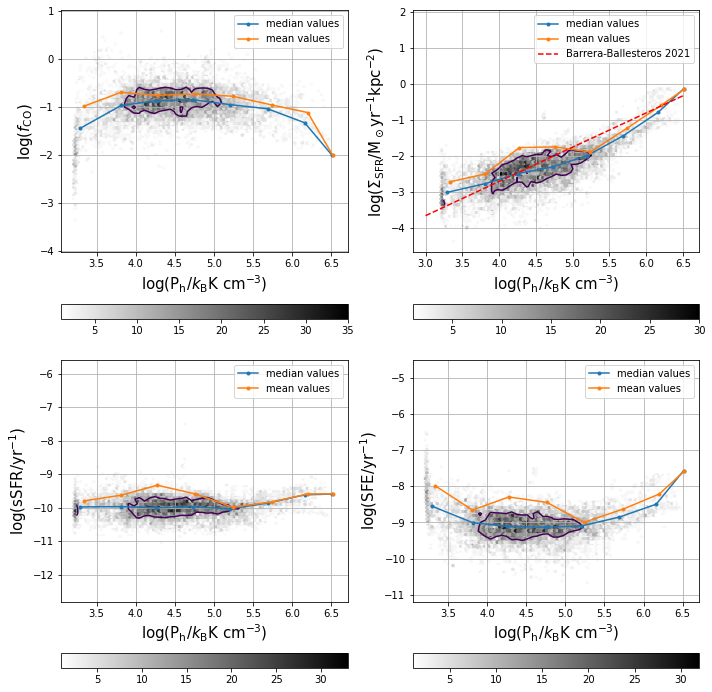

In [180]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
for ax,name,title,label in zip(axs.ravel(),['f_CO','S_SFR','sSFR','SFE'],
                          [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(np.log10(Database_SF['P_h']),np.log10(Database_SF[name]),mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    #print(stacked['P_h'].shape,frame.shape)
    ax.plot(np.log10(medians_Ph['P_h'].to_numpy()),np.log10(medians_Ph[name].to_numpy()),marker='.',label='median values')
    ax.plot(np.log10(mean_stacked['P_h'].to_numpy()),np.log10(mean_stacked[name].to_numpy()),marker='.',label='mean values')
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    ax.legend(loc='best')
    ax.contour(histograms[name][1],histograms[name][2],histograms[name][0],levels=[np.max(histograms[name][0])/2])
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
#axs[0,1].contour(X,Y,H.T,levels=[np.max(H)/2])
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

In [191]:
P_binwidth = 0.5
grouped_QS_0 = Database_SF.groupby(Database_SF.loc[:,'Final_QS'])
grouped_QS = Database_SF.groupby([Database_SF.loc[:,'Final_QS'],create_bins(np.log10(Database_SF.loc[:,'P_h']),P_binwidth)])
median_stacked_QS = grouped_QS[['S_Mstar','S_SFR','Ha_mask','R_21','Z_O3N2','Z_N2','alphaCO_O3N2','alphaCO_N2','S_mol_O3N2','CO_vdisp','star_vdisp','f_CO','sSFR','SFE','P_h','P_DE']].median()
mean_stacked_QS = grouped_QS[['S_Mstar','S_SFR','Ha_mask','R_21','Z_O3N2','Z_N2','alphaCO_O3N2','alphaCO_N2','S_mol_O3N2','CO_vdisp','star_vdisp','f_CO','sSFR','SFE','P_h','P_DE']].mean()

In [87]:
median_stacked_QS#.loc[('MX',),'P_h']

S_Mstar     S_SFR  Ha_mask      R_21    Z_O3N2      Z_N2  \
Final_QS P_h                                                                  
MX       3.0  5.976205e+06  0.000384      1.0  0.455411  0.688756  0.828525   
         3.5  1.895277e+07  0.000712      1.0  0.484437  0.710195  0.753229   
         4.0  5.077832e+07  0.003047      1.0  0.560258  0.745853  0.787406   
         4.5  8.162246e+07  0.004872      1.0  0.587180  0.765315  0.778410   
         5.0  1.269620e+08  0.005764      1.0  0.597137  0.807097  0.773246   
         5.5  3.733330e+08  0.030613      1.0  0.705651  0.670051  0.740639   
         6.0  8.195628e+08  0.356272      1.0  0.901941  0.475285  1.148391   
         6.5           NaN       NaN      NaN       NaN       NaN       NaN   
QnR      3.0  1.175030e+07  0.001164      1.0  0.508845  0.654880  0.706069   
         3.5  1.770628e+07  0.001355      1.0  0.516657  0.729561  0.709356   
         4.0  3.341596e+07  0.003379      1.0  0.566084  0.742750  0.716348   
         4.5  5.284823e+07  0.004431      1.0  0.581637  0.757696  0.730469   
         5.0  1.294506e+08  0.007819      1.0  0.615623  0.782651  0.746147   
         5.5  5.783182e+08  0.031314      1.0  0.707252  0.784832  0.759891   
         6.0           NaN       NaN      NaN       NaN       NaN       NaN   
         6.5           NaN       NaN      NaN       NaN       NaN       NaN   
SF       3.0  7.970971e+06  0.000834      1.0  0.492173  0.534612  0.622694   
         3.5  1.304158e+07  0.001538      1.0  0.523226  0.563244  0.610656   
         4.0  2.558600e+07  0.002915      1.0  0.557783  0.624661  0.659016   
         4.5  4.692506e+07  0.004789      1.0  0.586176  0.644121  0.676303   
         5.0  1.129549e+08  0.010511      1.0  0.634112  0.681505  0.711372   
         5.5  2.757643e+08  0.037786      1.0  0.720664  0.742709  0.711355   
         6.0  8.589106e+08  0.159241      1.0  0.832158  0.781795  0.720043   
         6.5  2.711188e+09  0.745376      1.0  0.971041  0.623030  0.732481   
cQ       3.0  2.664811e+07  0.001975      1.0  0.536487  0.616006  0.682599   
         3.5  3.256075e+07  0.002681      1.0  0.553124  0.641483  0.707280   
         4.0  4.841977e+07  0.004671      1.0  0.584709  0.638383  0.703103   
         4.5  7.487122e+07  0.007464      1.0  0.612772  0.674357  0.694753   
         5.0  1.476860e+08  0.012074      1.0  0.642964  0.742487  0.714806   
         5.5  5.506215e+08  0.014558      1.0  0.655106  0.719069  0.823419   
         6.0           NaN       NaN      NaN       NaN       NaN       NaN   
         6.5           NaN       NaN      NaN       NaN       NaN       NaN   
fR       3.0  4.442869e+06  0.000089      1.0  0.393487  0.778032  1.133409   
         3.5           NaN       NaN      NaN       NaN       NaN       NaN   
         4.0           NaN       NaN      NaN       NaN       NaN       NaN   
         4.5           NaN       NaN      NaN       NaN       NaN       NaN   
         5.0           NaN       NaN      NaN       NaN       NaN       NaN   
         5.5           NaN       NaN      NaN       NaN       NaN       NaN   
         6.0           NaN       NaN      NaN       NaN       NaN       NaN   
         6.5           NaN       NaN      NaN       NaN       NaN       NaN   
nR       3.0           NaN       NaN      NaN       NaN       NaN       NaN   
         3.5  6.674495e+07  0.000717      1.0  0.484808  0.663897  0.769934   
         4.0  2.038153e+07  0.001167      1.0  0.509005  0.743324  0.763349   
         4.5  7.512520e+07  0.002569      1.0  0.550772  0.704761  0.786424   
         5.0  9.977320e+07  0.001559      1.0  0.523947  0.632667  0.827713   
         5.5           NaN       NaN      NaN       NaN       NaN       NaN   
         6.0           NaN       NaN      NaN       NaN       NaN       NaN   
         6.5           NaN       NaN      NaN       NaN       NaN       NaN   

              alphaCO_O3N2  alphaCO_N2    S_mol_O3N2    CO_vdisp  st

In [182]:
for group_name, group in grouped_QS:
    print(group_name)
    #print(group)

('MX', 3.0)
('MX', 3.5)
('MX', 4.0)
('MX', 4.5)
('MX', 5.0)
('MX', 5.5)
('MX', 6.0)
('QnR', 3.0)
('QnR', 3.5)
('QnR', 4.0)
('QnR', 4.5)
('QnR', 5.0)
('QnR', 5.5)
('SF', 3.0)
('SF', 3.5)
('SF', 4.0)
('SF', 4.5)
('SF', 5.0)
('SF', 5.5)
('SF', 6.0)
('SF', 6.5)
('cQ', 3.0)
('cQ', 3.5)
('cQ', 4.0)
('cQ', 4.5)
('cQ', 5.0)
('cQ', 5.5)
('fR', 3.0)
('nR', 3.5)
('nR', 4.0)
('nR', 4.5)
('nR', 5.0)


In [211]:
grouped_QS_0.count()

Final_NA  S_Mstar  S_SFR  Ha_mask   R_21  Z_O3N2   Z_N2  \
Final_QS                                                            
MX             611      611    611      611    611     593    611   
QnR           2516     2516   2516     2516   2516    2507   2516   
SF           14092    14092  14092    14092  14054   13924  14069   
cQ            3623     3623   3623     3623   3623    3559   3623   
fR               8        8      8        8      8       8      8   
nR              63       63     63       63     63      61     63   

          alphaCO_O3N2  alphaCO_N2  S_mol_O3N2  CO_vdisp  star_vdisp   f_CO  \
Final_QS                                                                      
MX                 593         611         373       383         611    373   
QnR               2507        2516        1779      1788        2516   1779   
SF               13924       14069       11468     11611       14029  11468   
cQ                3559        3623        2352      2356        3623   2352   
fR                   8           8           1         1           8      1   
nR                  61          63          30        30          63     30   

           sSFR    SFE    P_h   P_DE  
Final_QS                              
MX          611    373    373    373  
QnR        2516   1779   1779   1779  
SF        14092  11468  11465  11465  
cQ         3623   2352   2352   2352  
fR            8      1      1      1  
nR           63     30     30     30

In [196]:
histograms_QS = {(name,QS):get_2dhist(np.log10(grouped_QS_0.get_group(QS)['P_h']),np.log10(grouped_QS_0.get_group(QS)[name])) for name in ['f_CO','S_SFR','sSFR','SFE'] for QS in ['SF','QnR','MX','cQ','nR','fR']}

/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/users/brodriguez/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


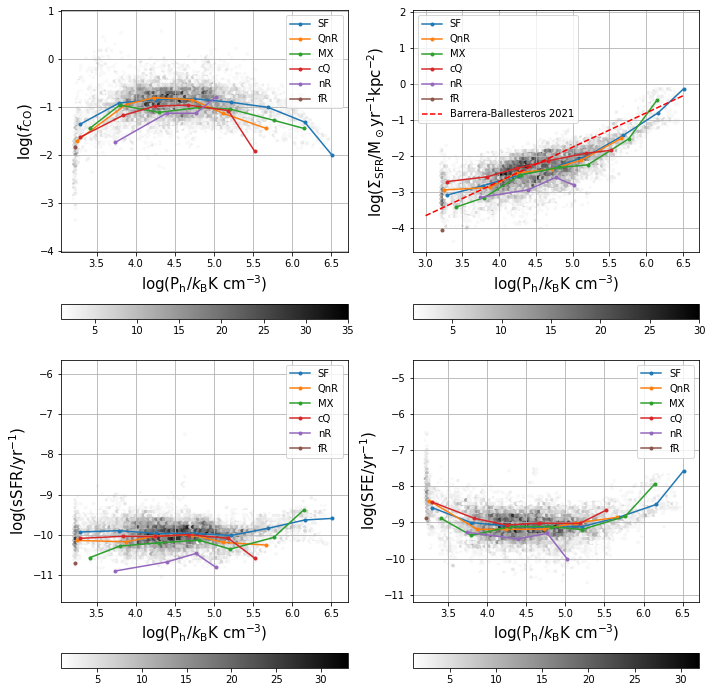

In [215]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

for ax,name,title,label in zip(axs.ravel(),['f_CO','S_SFR','sSFR','SFE'],
                              [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(np.log10(Database_SF['P_h']),np.log10(Database_SF[name]),mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    for QS in ['SF','QnR','MX','cQ','nR','fR']:
        #ax.scatter(np.log10(median_stacked_QS.loc[(QS,),'P_h']),np.log10(median_stacked_QS.loc[(QS,),name]),s=10,label=QS)
        ax.plot(np.log10(median_stacked_QS.loc[(QS,),'P_h'].to_numpy()),np.log10(median_stacked_QS.loc[(QS,),name].to_numpy()),marker='.',label=QS)
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    ax.legend(loc='best')
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()

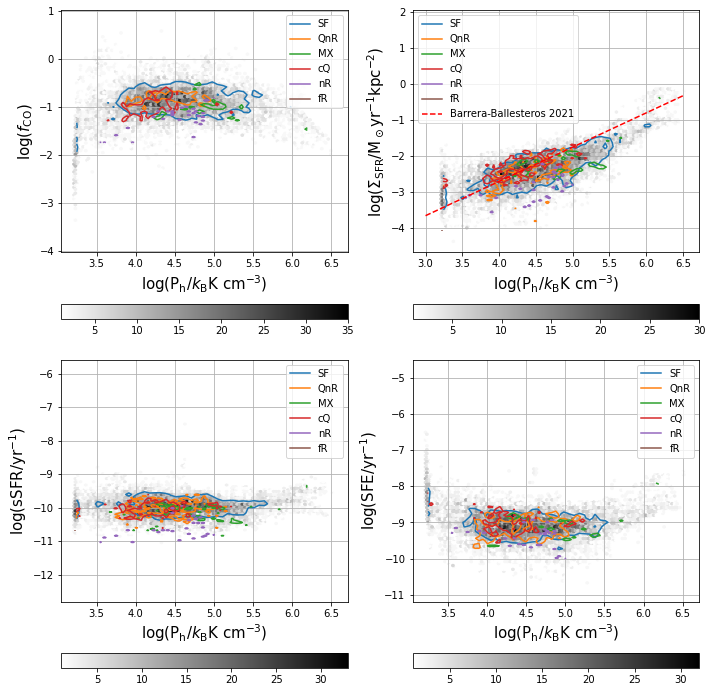

In [214]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

for ax,name,title,label in zip(axs.ravel(),['f_CO','S_SFR','sSFR','SFE'],
                              [r'$f_\mathrm{CO}$',r'$\Sigma_\mathrm{SFR}$','sSFR','SFE'],[r'log($f_\mathrm{CO}$)',r'log($\Sigma_\mathrm{SFR}$/M$_\odot$yr$^{-1}$kpc$^{-2}$)',r'log(sSFR/yr$^{-1}$)',r'log(SFE/yr$^{-1}$)']):
    im = ax.hexbin(np.log10(Database_SF['P_h']),np.log10(Database_SF[name]),mincnt=1,cmap='binary')
    fig.colorbar(im,ax=ax,orientation='horizontal')
    for QS,color in zip(['SF','QnR','MX','cQ','nR','fR'],mcolors.TABLEAU_COLORS):
        ax.plot([],[],c=color,label=QS)
        ax.contour(histograms_QS[(name,QS)][1],histograms_QS[(name,QS)][2],histograms_QS[(name,QS)][0],levels=[np.max(histograms_QS[(name,QS)][0])/3],colors=color)
        #ax.contour(histograms_QS[(name,QS)][1],histograms_QS[(name,QS)][2],histograms_QS[(name,QS)][0],levels=2,colors=color)
    ax.set_ylabel(label,size=15)
    ax.grid(True)
    ax.set_xlabel(r'log(P$_\mathrm{h}$/$k_\mathrm{B}$K cm$^{-3}$)',size=15)
    ax.legend(loc='best')
    
axs[0,1].plot([3.,6.5],[b*(3.-4)+A-3,b*(6.5-4)+A-3],c='r',ls='--',label='Barrera-Ballesteros 2021')
axs[0,1].legend(loc='best')
fig.tight_layout()
plt.show()